# Exploring Jupyter contribution history

Making charts for @minrk's JupyterCon 2020 keynote

In [109]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
%run utils.py

Load data processed from the raw event sources in [post-process-data](post-process-data.ipynb)

In [114]:
df = pd.read_feather("data/processed.feather")
df.tail()

type                  repo_name  actor_id  \
491363          PushEvent          jupyter-xeus/xeus   6754742   
491364   PullRequestEvent          jupyter-xeus/xeus   6754742   
491365  IssueCommentEvent  jupyterhub/oauthenticator    163203   
491366         EmailEvent            jupyter/jupyter  72165245   
491367         EmailEvent            jupyter/jupyter  72165246   

                actor_login           org                      date  
491363         JohanMabille  jupyter-xeus 2020-09-30 23:45:29+00:00  
491364         JohanMabille  jupyter-xeus 2020-09-30 23:45:29+00:00  
491365             rpwagner    jupyterhub 2020-09-30 23:48:29+00:00  
491366  pratikshapandey0912       jupyter 2020-10-03 06:54:32+00:00  
491367     darshanbeniwal11       jupyter 2020-10-03 09:32:58+00:00

## Plotting utilities

plot_events does some common plotting, either groupby timeseries
or total counts bar charts

In [107]:
%run utils.py

<Figure size 720x444.984 with 0 Axes>

org
jupyter              141833
ipython              138726
jupyterlab            87875
jupyterhub            73287
jupyter-widgets       26380
jupyter-incubator     16793
voila-dashboards       3101
jupyter-xeus           2094
binder-examples        1279
Name: actor_id, dtype: int64

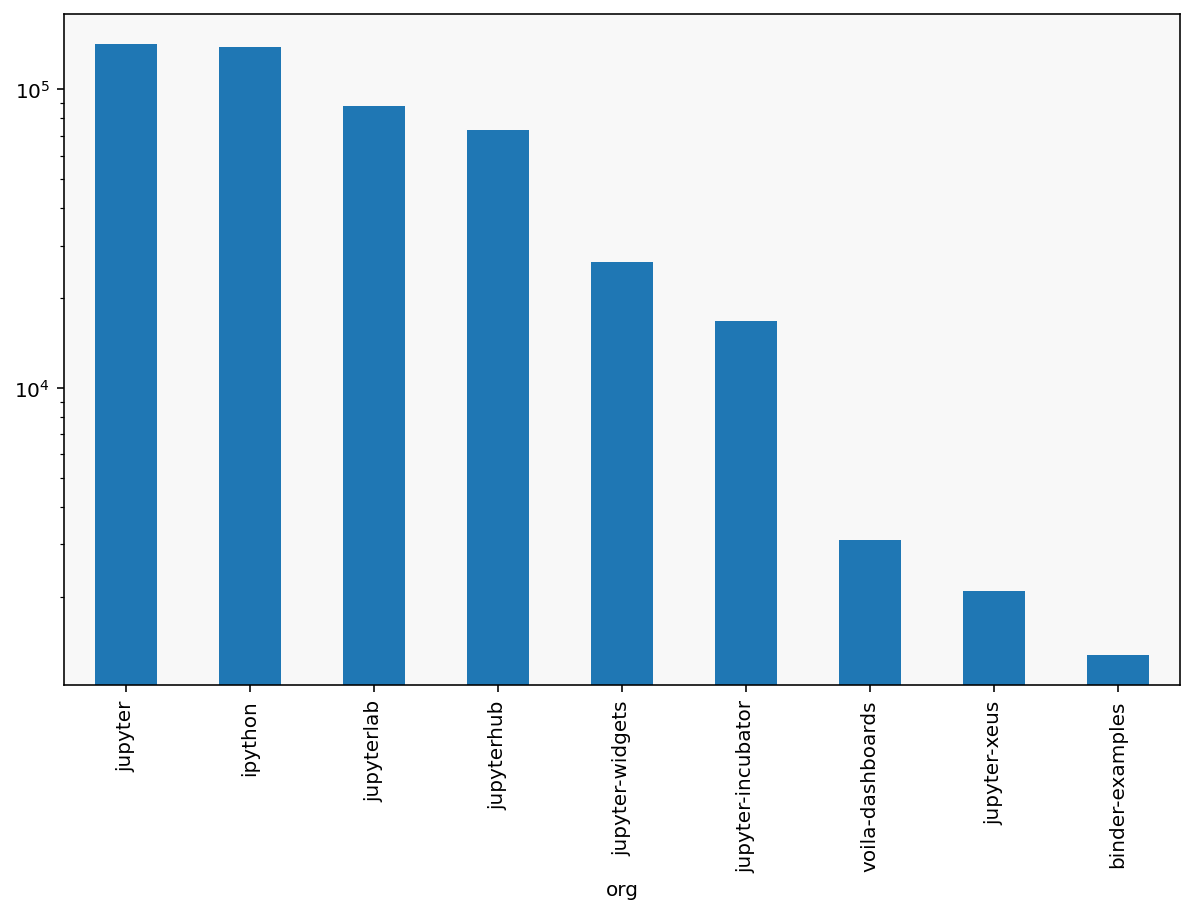

In [112]:
plot_events(df, groupby="org", n=10, logy=True)

org
jupyterlab         22151
jupyter            22011
jupyterhub         17122
jupyter-widgets     4324
ipython             3906
Name: actor_id, dtype: int64

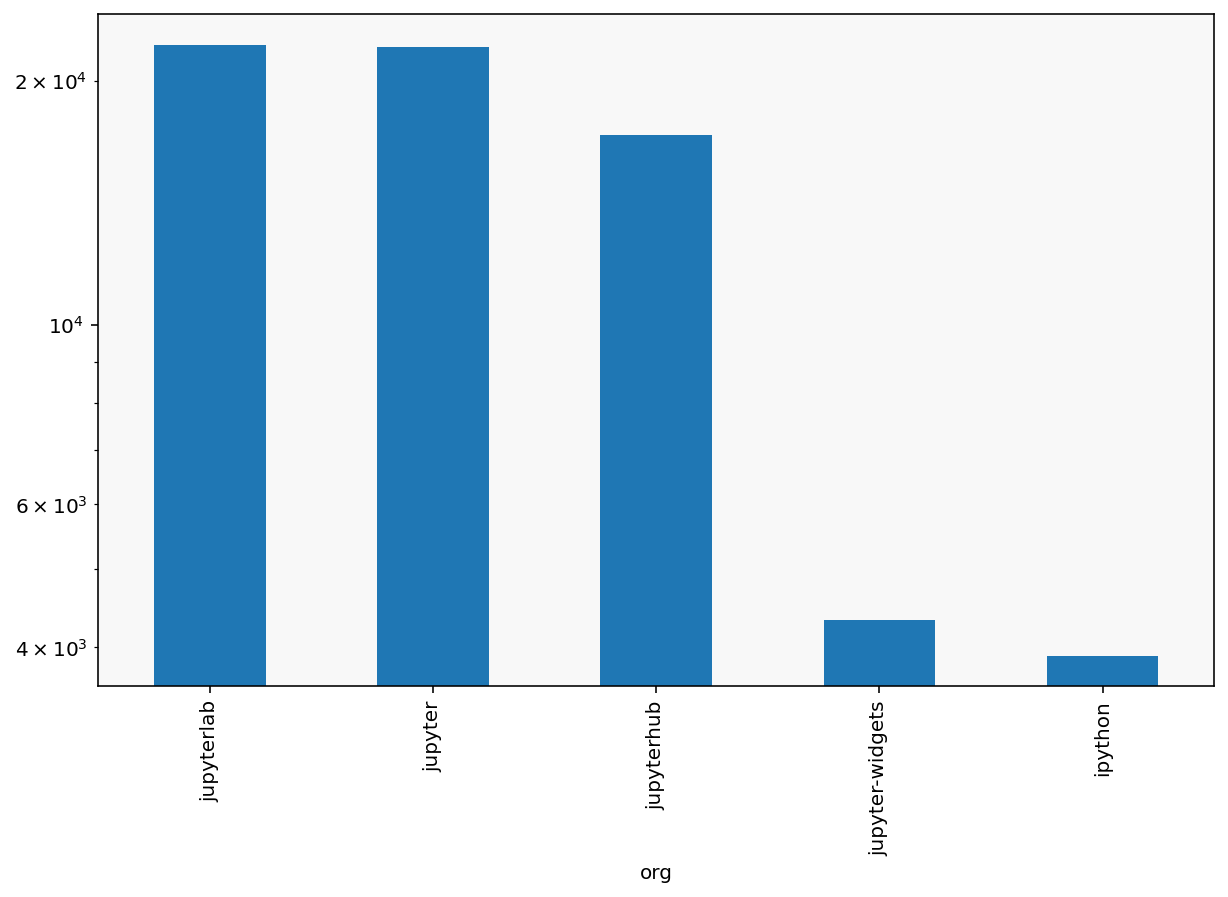

In [113]:
plot_events(df, groupby="org", year=2019, logy=True)

In [68]:
fig = plt.gcf()
fig.get_clip_box()

<Figure size 720x444.984 with 0 Axes>

Saved /Users/minrk/Documents/Jupyter/pres/2020/jupytercon/jupyterhub-monthly.pdf
Saved /Users/minrk/Documents/Jupyter/pres/2020/jupytercon/jupyterhub-monthly-annotated.pdf


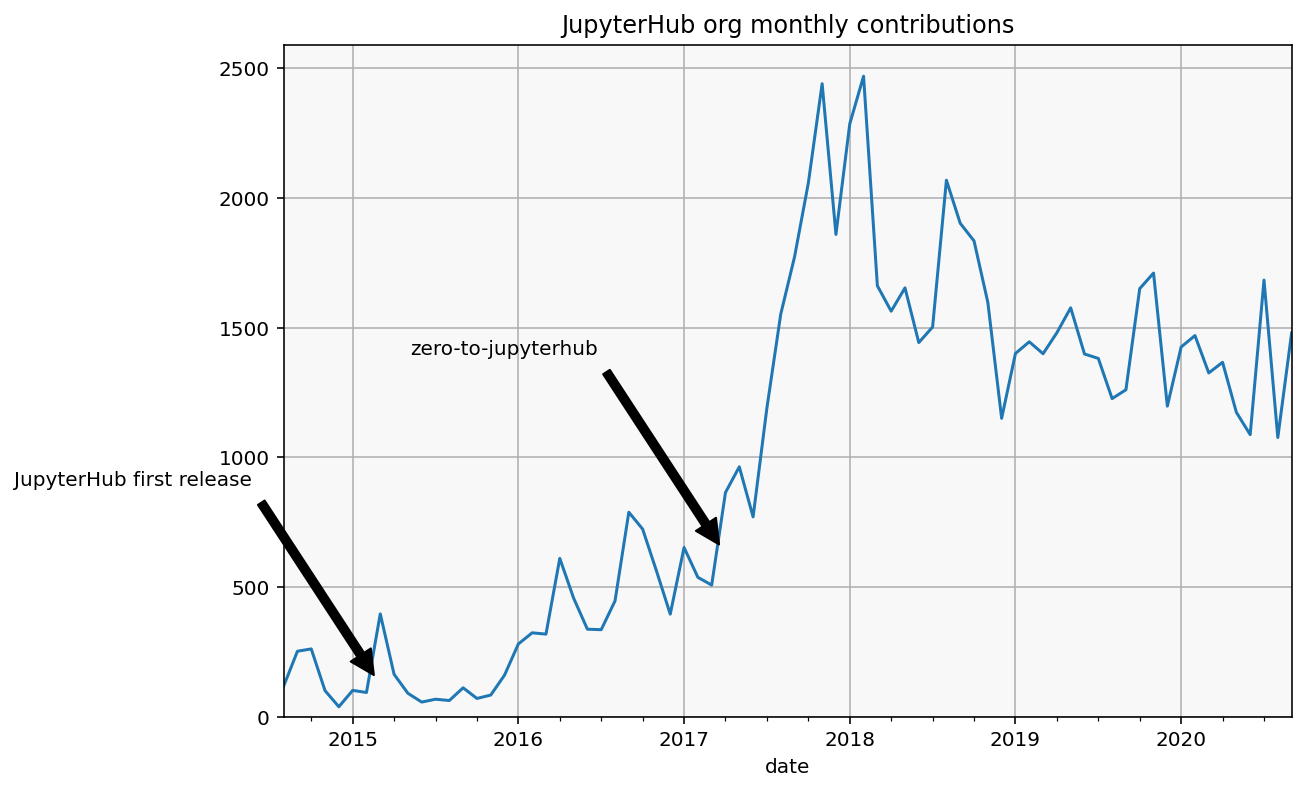

In [71]:
data = plot_events(
    df,
    org="jupyterhub",
    groupby="org",
    timeseries=True,
    kind="line",
    stacked=False,
    legend=False,
#     smooth="90d",
)
plt.title("JupyterHub org monthly contributions")
plt.ylim(0, None)
plt.subplots_adjust(left=0.2)
savefig("jupyterhub-monthly", bbox_inches=None)

add_lines(
    data["jupyterhub"],
    {
        "2015-03-03": "JupyterHub first release",
        "2017-04-10": "zero-to-jupyterhub",
        #   "2019-05-03": "JupyterHub 1.0",
    },
    alternate=False,
)
savefig("jupyterhub-monthly-annotated", bbox_inches=None)



Saved /Users/minrk/Documents/Jupyter/pres/2020/jupytercon/jupyterhub-monthly-unique.pdf


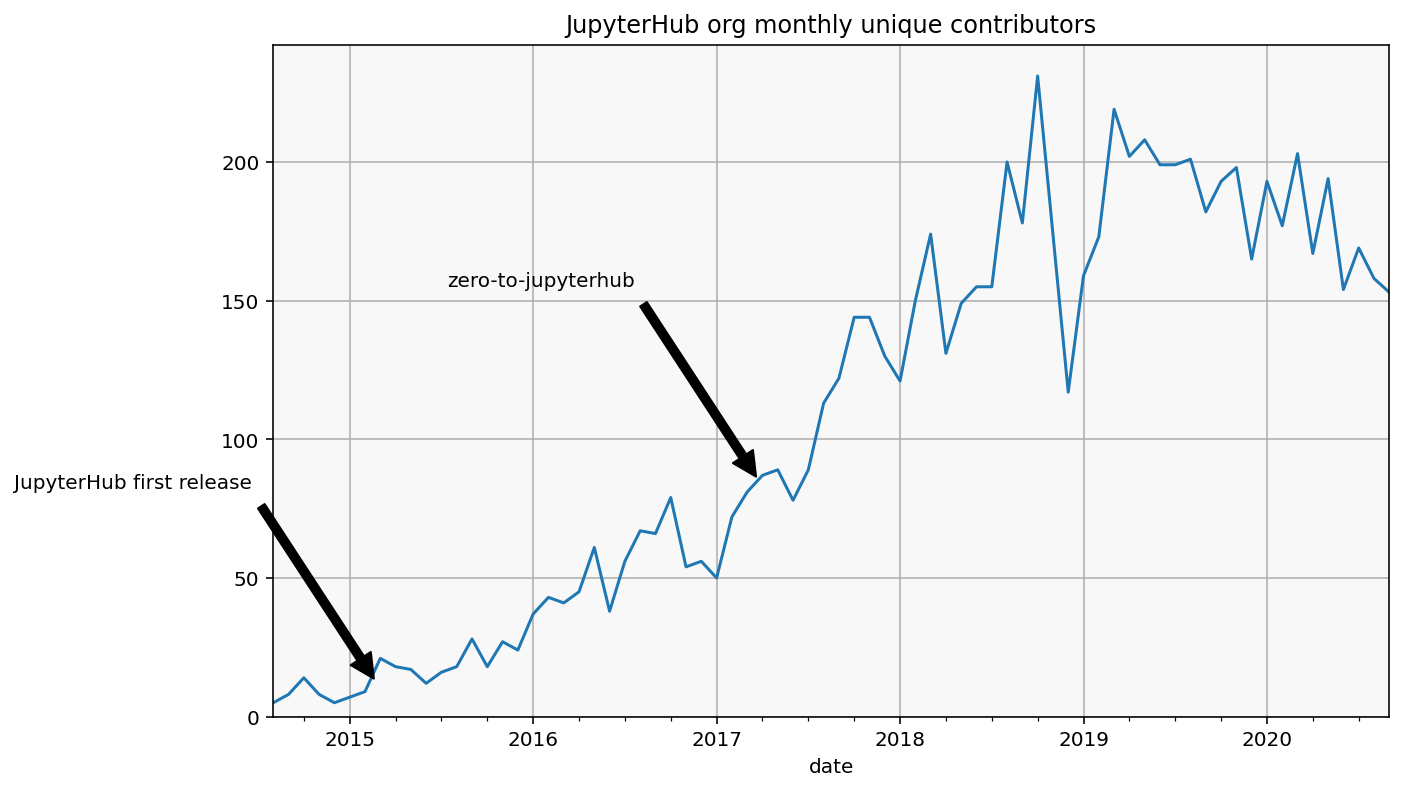

In [17]:
data = plot_events(
    df,
    org="jupyterhub",
    groupby="org",
    timeseries=True,
    kind="line",
    metric="nunique",
    stacked=False,
    legend=False,
#     smooth="90d",
)
add_lines(
    data["jupyterhub"],
    {
        "2015-03-03": "JupyterHub first release",
        "2017-04-10": "zero-to-jupyterhub",
        #   "2019-05-03": "JupyterHub 1.0",
    },
    alternate=False,
)
plt.ylim(0, None)
plt.title('JupyterHub org monthly unique contributors')
savefig("jupyterhub-monthly-unique")

Saved /Users/minrk/Documents/Jupyter/pres/2020/jupytercon/monthly-by-org.pdf


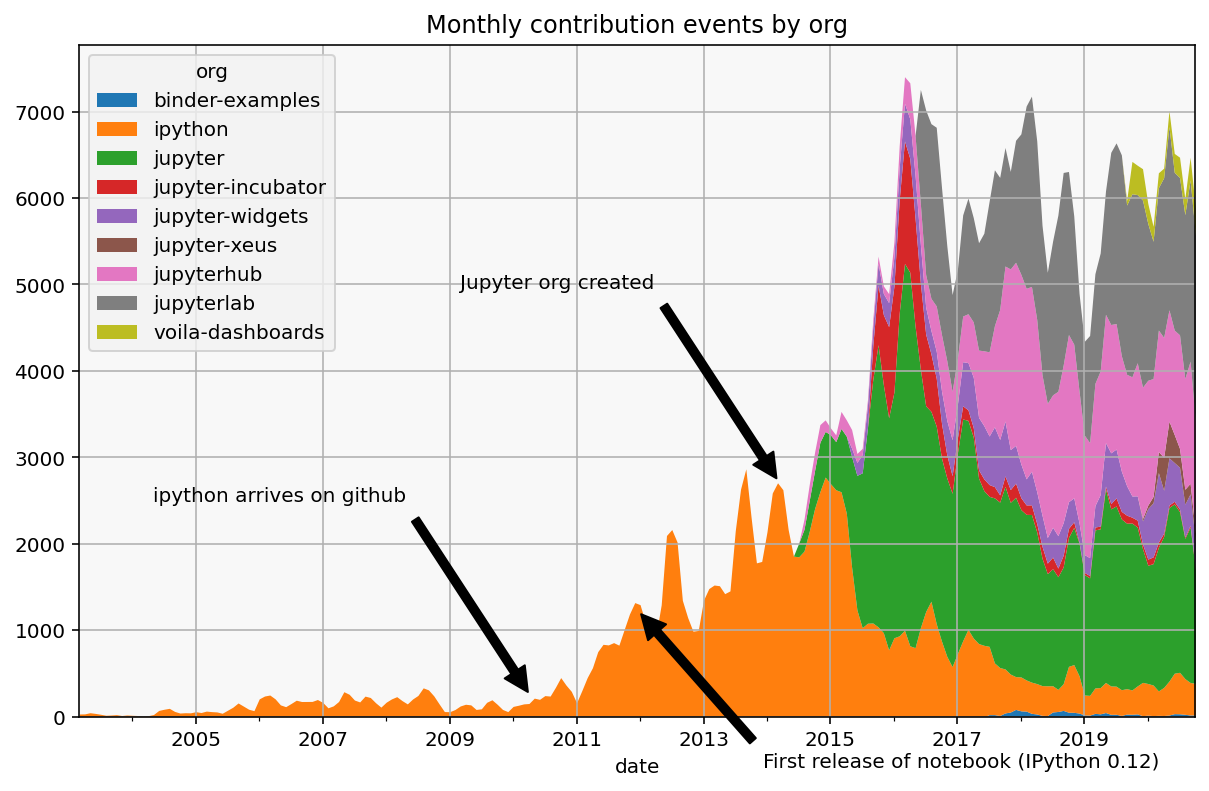

In [77]:
# repos = ["ipython/ipython", "jupyter/jupyter_core", "jupyter/nbformat", "jupyter/notebook", "jupyter-widgets/ipywidgets", "jupyterlab/jupyterlab"]
# subset = df[df.repo_name.isin(repos)]
data = plot_events(df, groupby="org", smooth="90d", timeseries=True)
add_lines(data["ipython"])
plt.title("Monthly contribution events by org")
savefig("monthly-by-org")

Saved /Users/minrk/Documents/Jupyter/pres/2020/jupytercon/monthly-unique.pdf


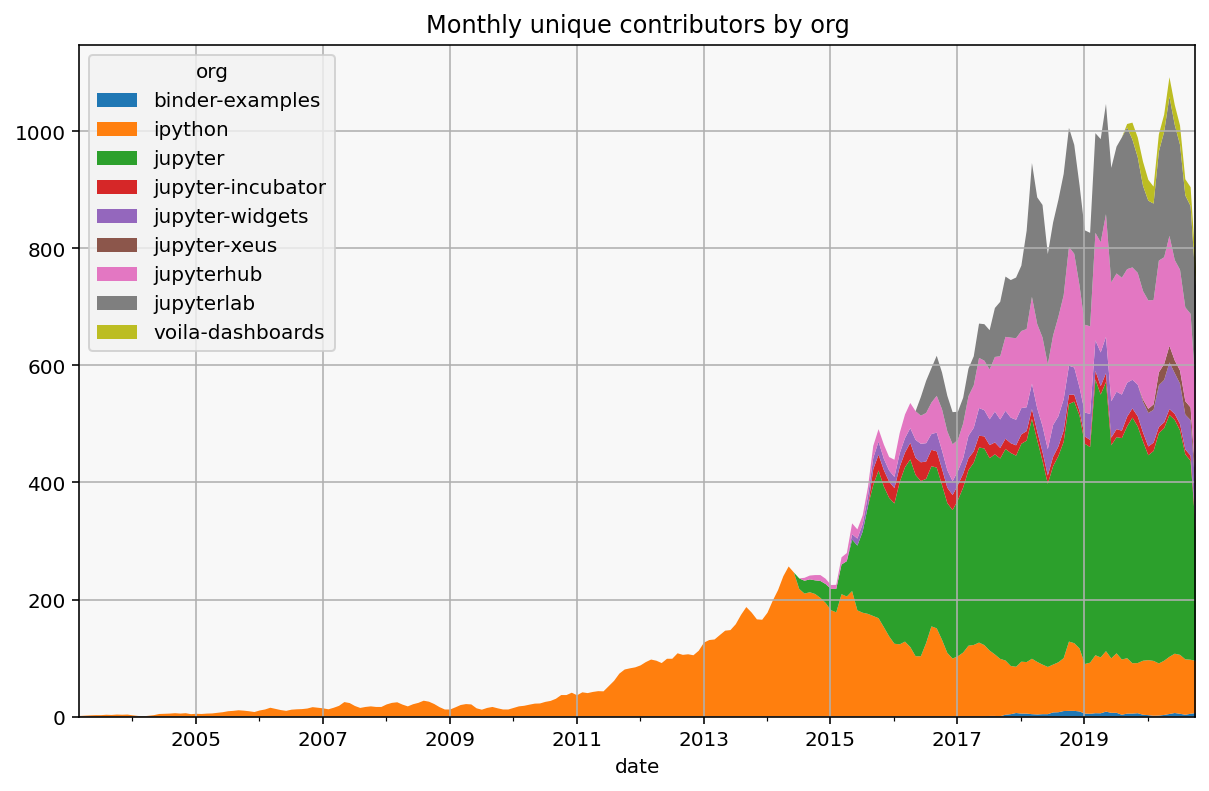

In [78]:
plot_events(df, groupby="org", timeseries=True, smooth="90d", metric="nunique")
plt.title("Monthly unique contributors by org")
savefig("monthly-unique")

Saved /Users/minrk/Documents/Jupyter/pres/2020/jupytercon/monthly-unique-all.pdf


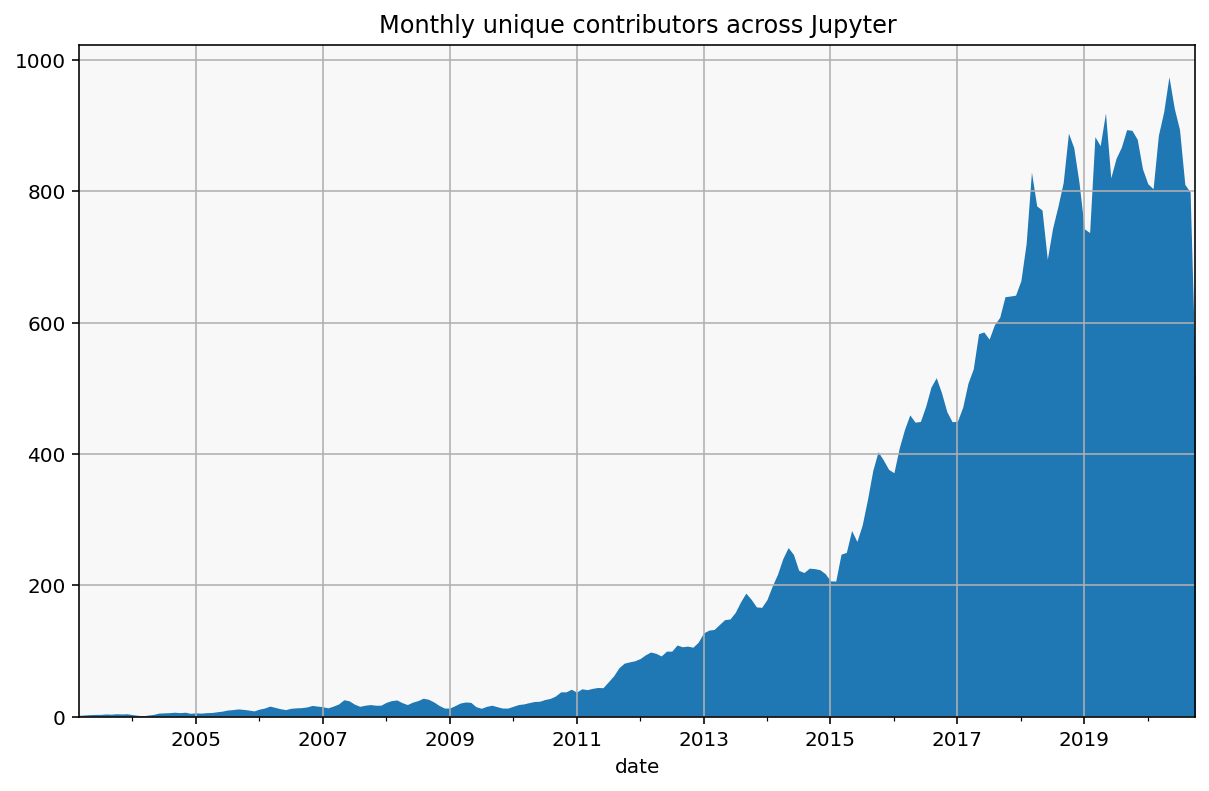

In [79]:
plot_events(df, groupby=None, timeseries=True, smooth="90d", metric="nunique")
plt.title("Monthly unique contributors across Jupyter")
savefig("monthly-unique-all")

In [56]:
plt.rc("savefig")

In [58]:
from matplotlib.transforms import Bbox



Saved /Users/minrk/Documents/Jupyter/pres/2020/jupytercon/ipython-monthly-09.pdf
Saved /Users/minrk/Documents/Jupyter/pres/2020/jupytercon/ipython-monthly-unique-09.pdf


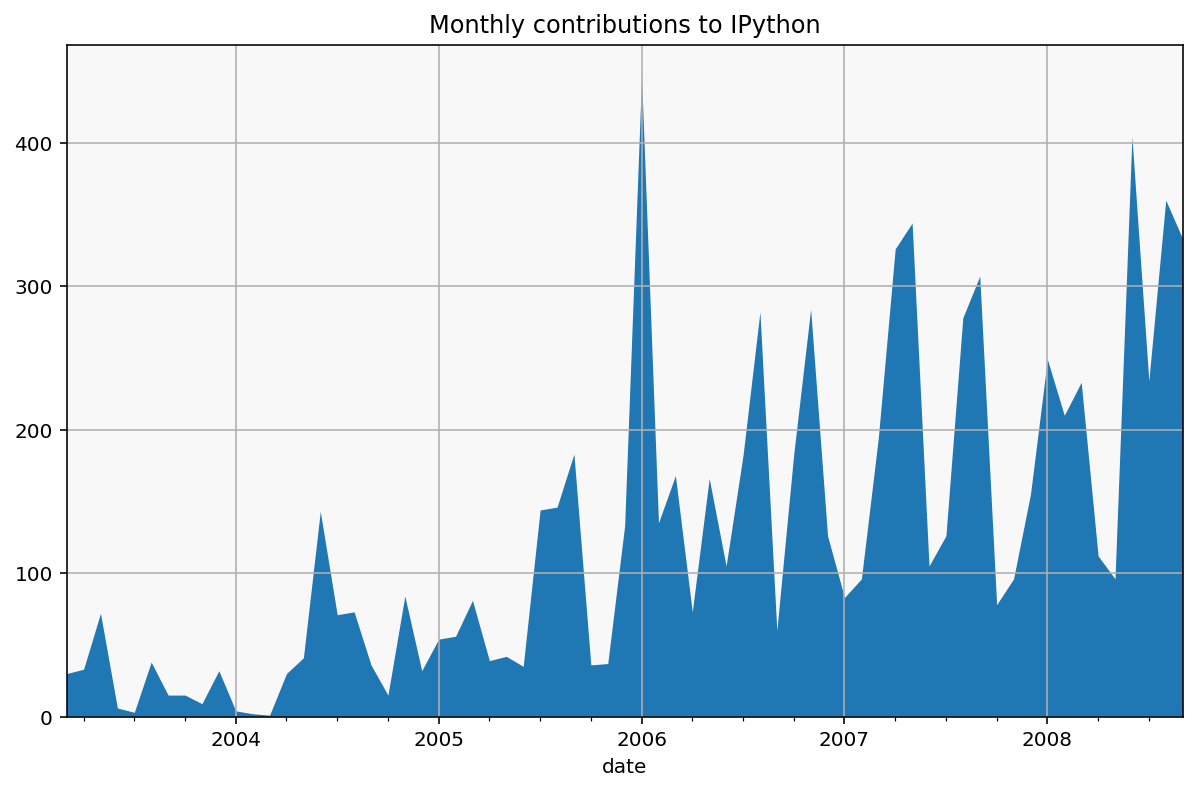

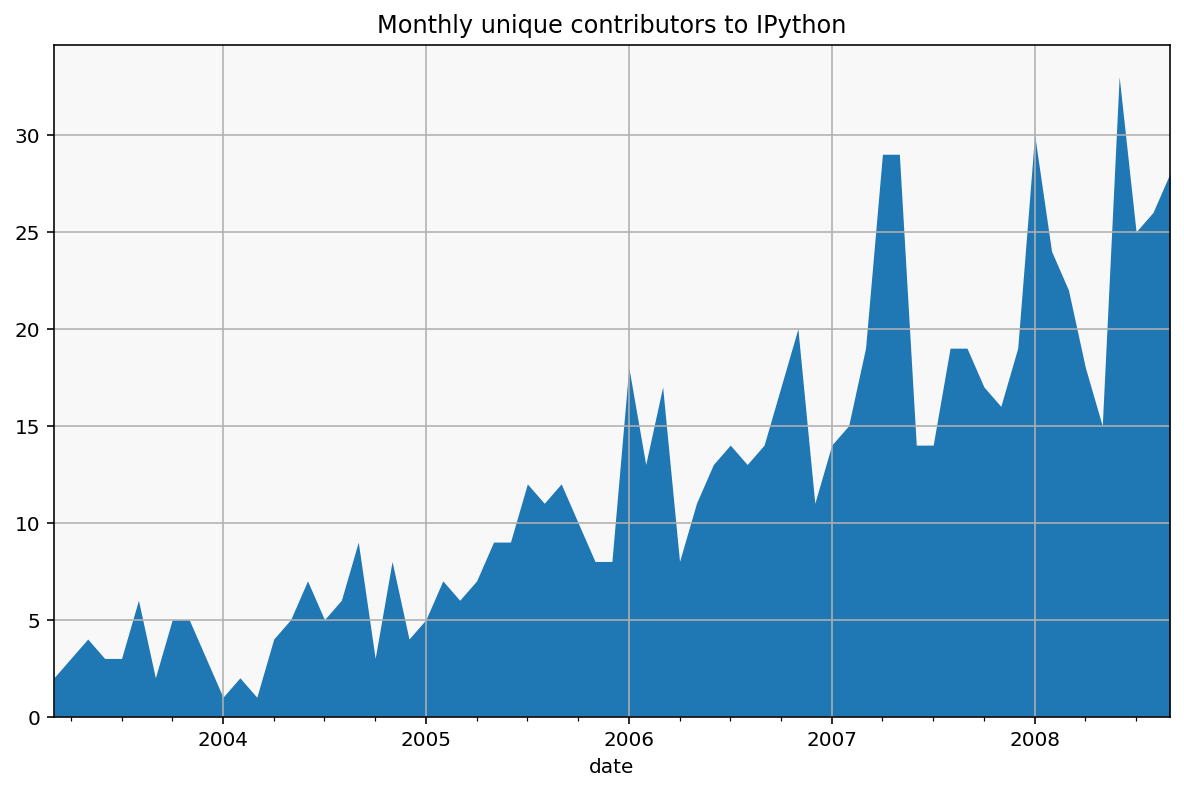

In [90]:
ipython_monthly_09 = plot_events(
    df[(df["org"] == "ipython") & (df.date <= "2008-10-01")],
    groupby=None,
    timeseries=True,
    freq="M",
    #     smooth="60d",
)
plt.title("Monthly contributions to IPython")
savefig("ipython-monthly-09", bbox_inches=None)
plt.figure()
ipython_monthly_unique_09 = plot_events(
    df[(df["org"] == "ipython") & (df.date <= "2008-10-01")],
    groupby=None,
    timeseries=True,
    freq="M",
    metric="nunique",
    #     smooth="60d",
)
plt.title("Monthly unique contributors to IPython")
savefig("ipython-monthly-unique-09", bbox_inches=None)


# scipys = {}
# for year in range(2004, 2009):
#     scipys[f"{year}-07-31"] = f"SciPy '{str(year)[-2:]}"
# # scipys["201"]
# add_lines(ipython_monthly, scipys, alternate=False)
# # plt.savefig("test.png", bbox_inches=None) #, bbox_inches=Bbox(np.array([[0, 0], [10, 10]])))
# savefig("ipython-monthly-09-scipy", bbox_inches=None)

Saved /Users/minrk/Documents/Jupyter/pres/2020/jupytercon/ipython-monthly.pdf
Saved /Users/minrk/Documents/Jupyter/pres/2020/jupytercon/ipython-monthly-scipy.pdf


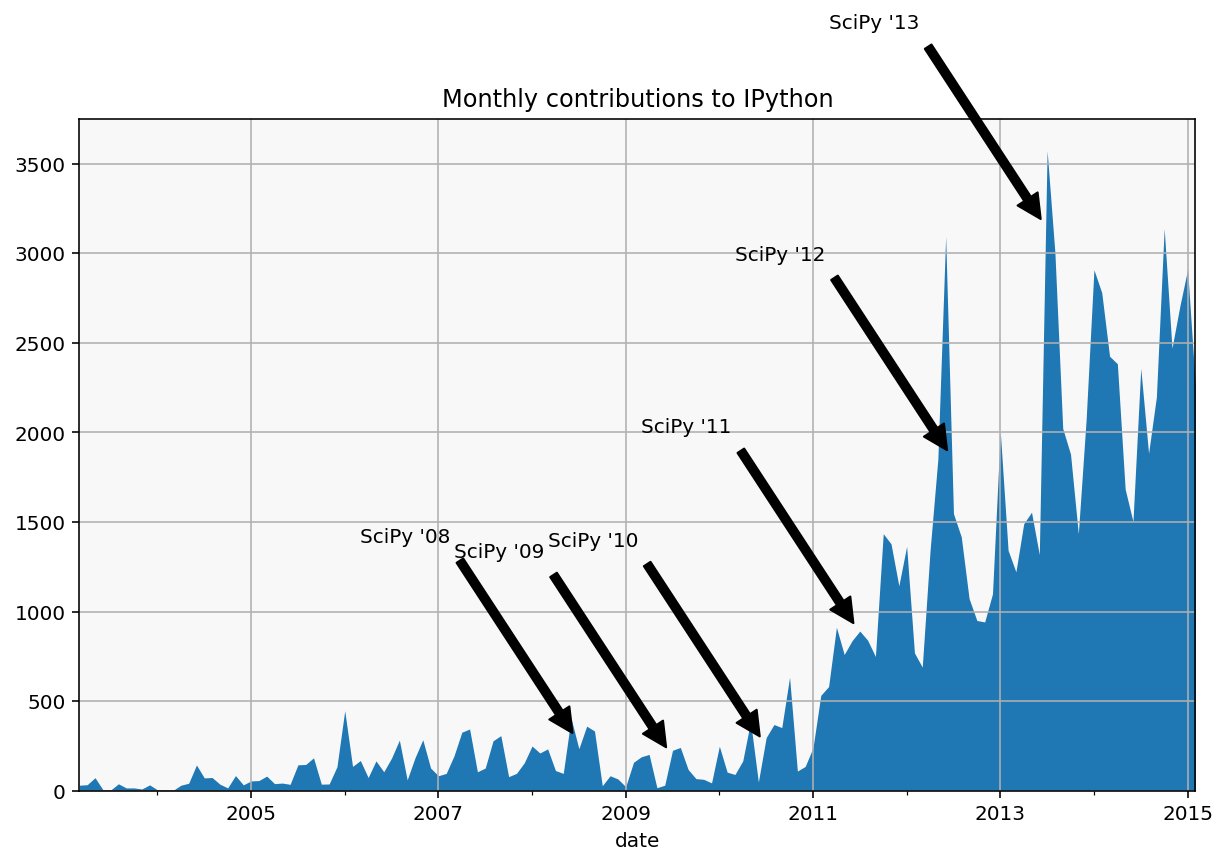

In [66]:
ipython_monthly = plot_events(
    df[(df["org"] == "ipython") & (df.date <= "2015-03-01")],
    groupby=None,
    timeseries=True,
    freq="M",
    #     smooth="60d",
)
plt.title("Monthly contributions to IPython")
savefig("ipython-monthly", bbox_inches=None)

scipys = {}
for year in [2008, 2009, 2010, 2011, 2012, 2013]:
    scipys[f"{year}-07-25"] = f"SciPy '{str(year)[-2:]}"
# scipys["201"]
add_lines(ipython_monthly, scipys, alternate=False)
# plt.savefig("test.png", bbox_inches=None) #, bbox_inches=Bbox(np.array([[0, 0], [10, 10]])))
savefig("ipython-monthly-scipy", bbox_inches=None)

Saved /Users/minrk/Documents/Jupyter/pres/2020/jupytercon/yearly-count-org.pdf
Saved /Users/minrk/Documents/Jupyter/pres/2020/jupytercon/yearly-count-org-annotated.pdf


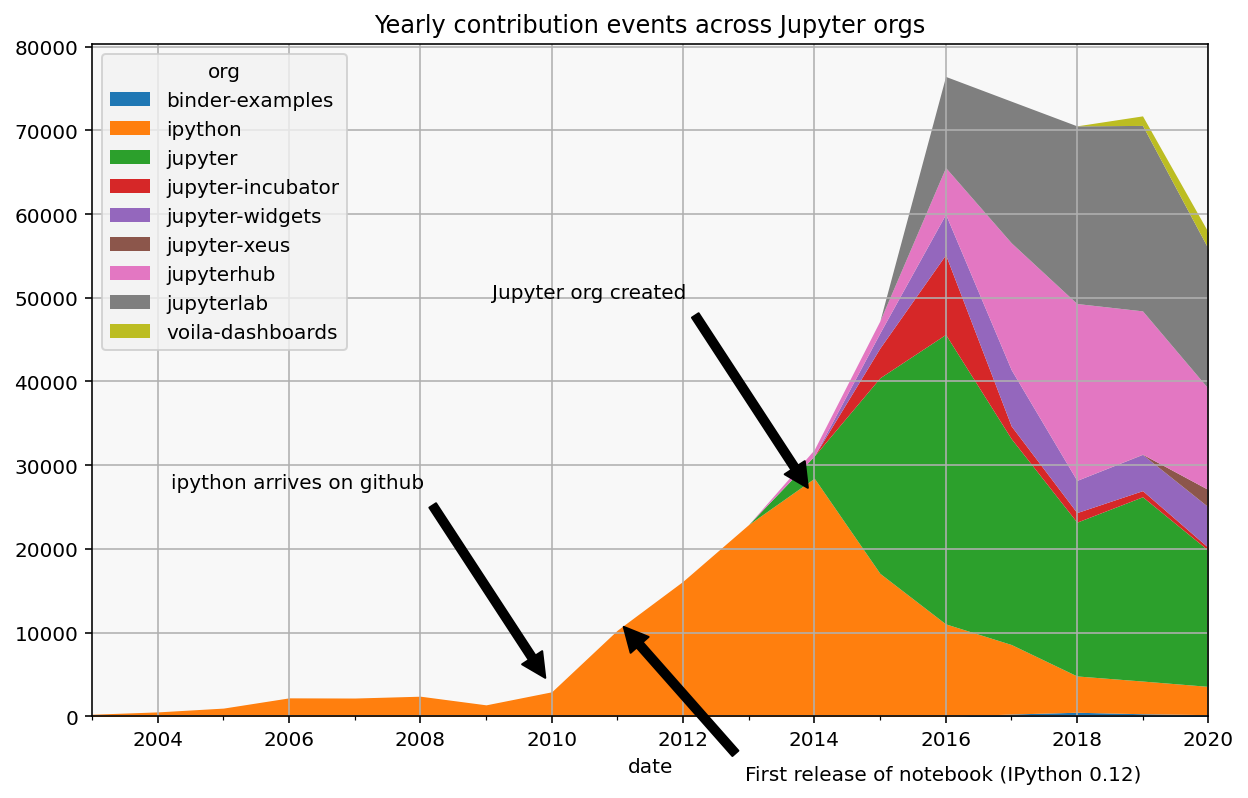

In [76]:
data = plot_events(df, groupby="org", timeseries=True, freq="Y", metric="count")
plt.title("Yearly contribution events across Jupyter orgs")
savefig("yearly-count-org")
add_lines(data["ipython"] + 1500)
savefig("yearly-count-org-annotated")

In [23]:
df[df.org=="jupyterhub"].groupby("repo_name").actor_id.nunique().sort_values()[-10:]

repo_name
jupyterhub/mybinder.org-deploy         104
jupyterhub/jupyter-server-proxy        106
jupyterhub/ldapauthenticator           187
jupyterhub/kubespawner                 223
jupyterhub/binderhub                   276
jupyterhub/oauthenticator              283
jupyterhub/dockerspawner               292
jupyterhub/the-littlest-jupyterhub     388
jupyterhub/zero-to-jupyterhub-k8s      643
jupyterhub/jupyterhub                 1934
Name: actor_id, dtype: int64

Saved /Users/minrk/Documents/Jupyter/pres/2020/jupytercon/jupyterhub-monthly-repos.pdf


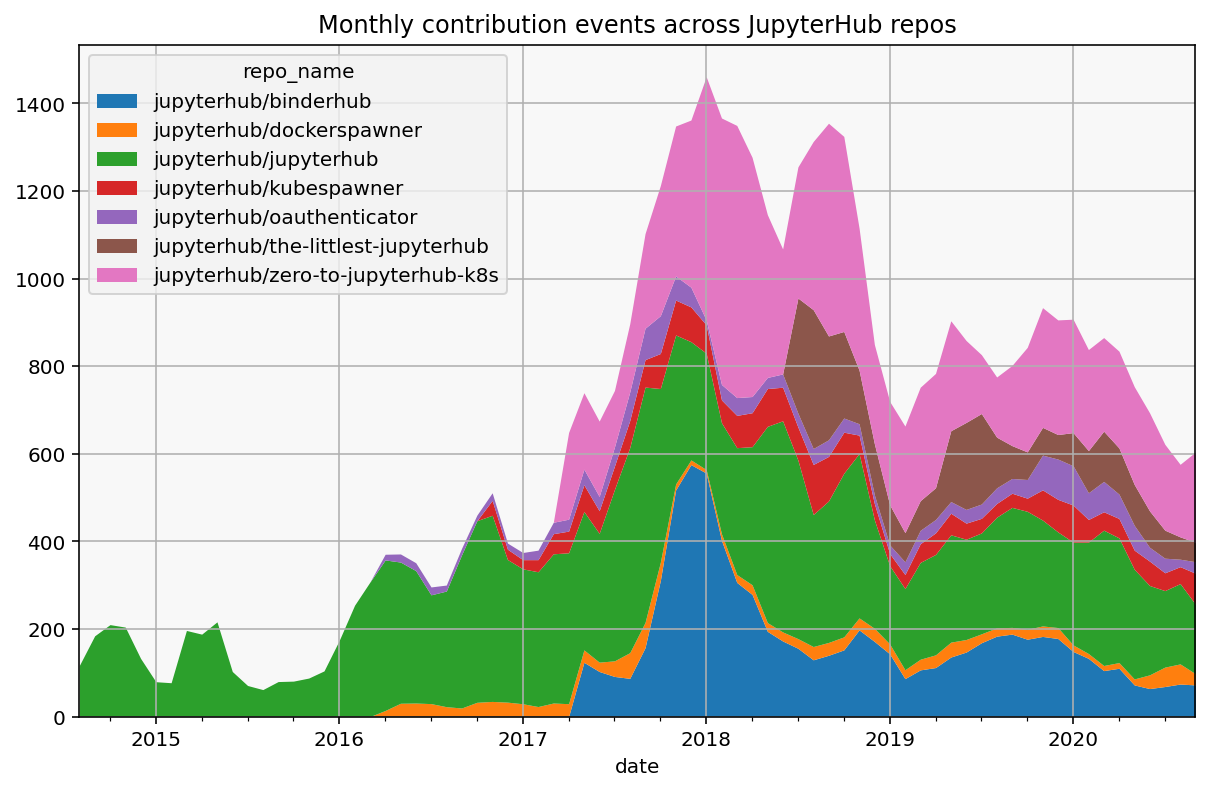

In [24]:
top_jupyterhub_repos = df[df.org=="jupyterhub"].groupby("repo_name").actor_id.nunique().sort_values(ascending=False)

filtered = df[df.repo_name.isin(top_jupyterhub_repos.index[:7])]
data = plot_events(filtered, groupby="repo_name", timeseries=True, metric="count", freq="M", smooth="90d")
plt.title("Monthly contribution events across JupyterHub repos")
savefig("jupyterhub-monthly-repos")
# add_lines(data["ipython"])
# savefig("yearly-count-org-annotated")

Saved /Users/minrk/Documents/Jupyter/pres/2020/jupytercon/jupyterhub-monthly-repos-unique.pdf


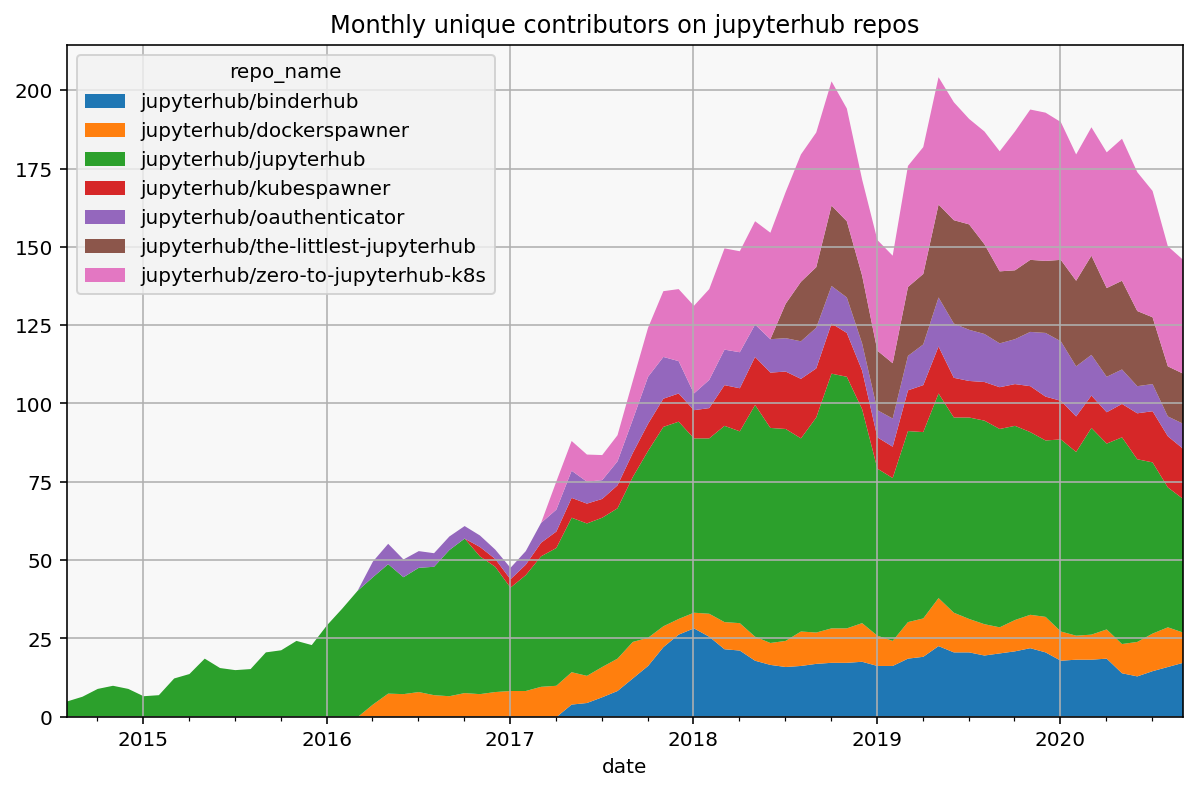

In [25]:
data = plot_events(filtered, groupby="repo_name", timeseries=True, freq="M", smooth="90d", metric="nunique")
plt.title("Monthly unique contributors on jupyterhub repos")
savefig("jupyterhub-monthly-repos-unique")
# add_lines(data["ipython"])
# savefig("yearly-count-org-annotated")

Saved /Users/minrk/Documents/Jupyter/pres/2020/jupytercon/yearly-unique-org.pdf


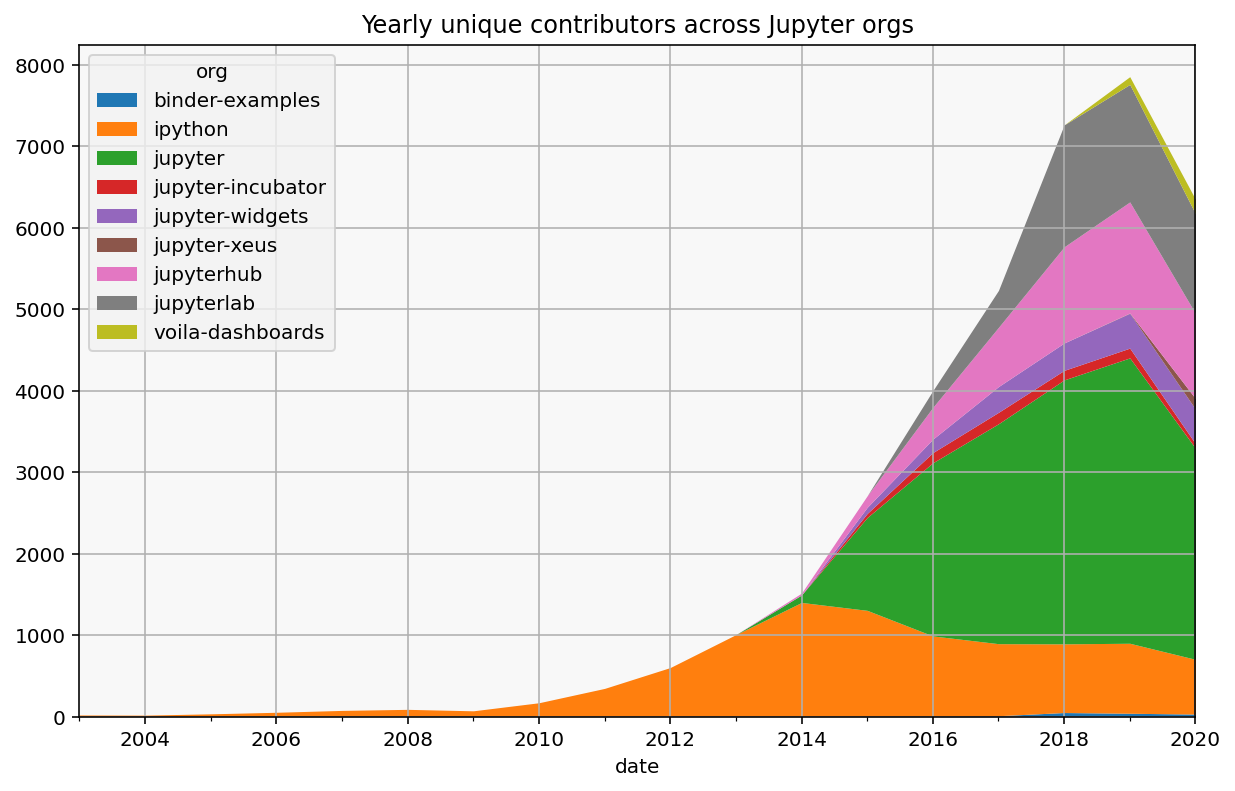

In [84]:
plot_events(df, groupby="org", timeseries=True, freq="Y", metric="nunique")
plt.title("Yearly unique contributors across Jupyter orgs")
savefig("yearly-unique-org")

Saved /Users/minrk/Documents/Jupyter/pres/2020/jupytercon/yearly-unique-all.pdf


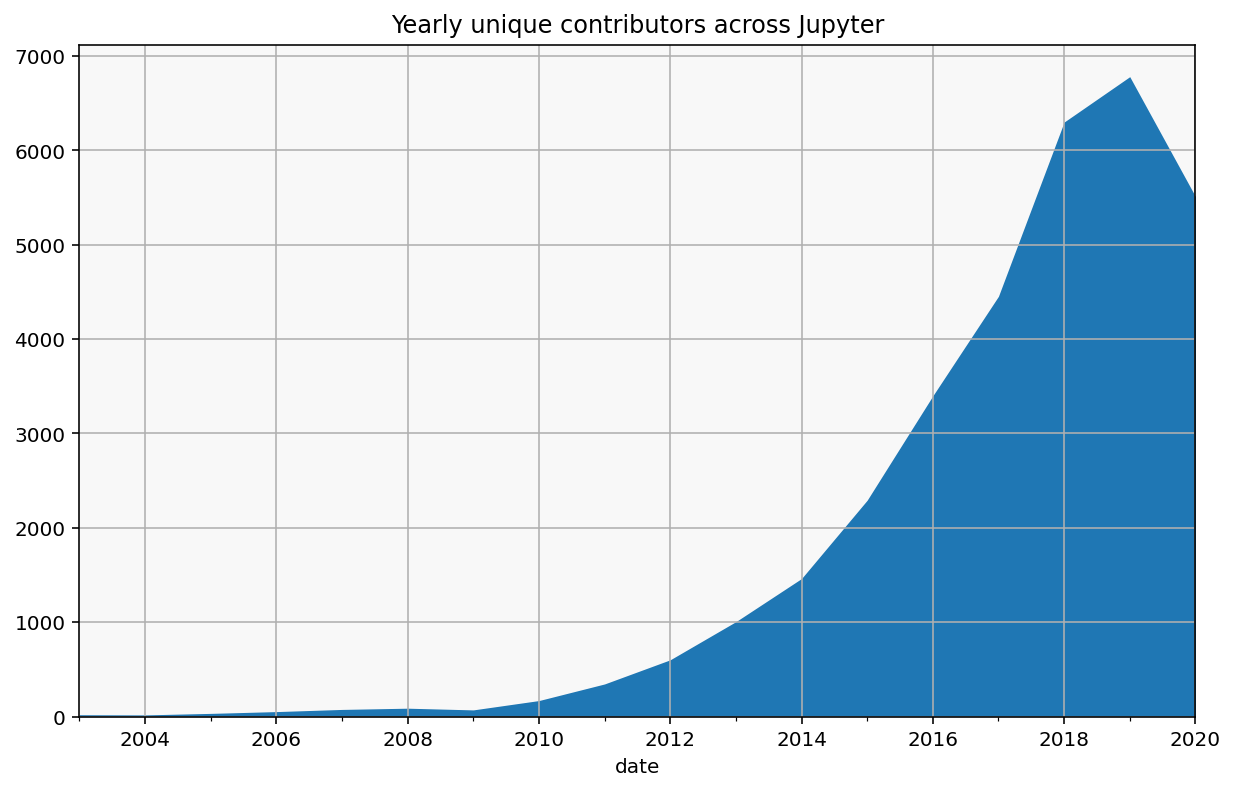

In [27]:
plot_events(df, groupby=None, timeseries=True, freq="Y", metric="nunique")
plt.title("Yearly unique contributors across Jupyter")
savefig("yearly-unique-all")

Saved /Users/minrk/Documents/Jupyter/pres/2020/jupytercon/monthly-repos.pdf


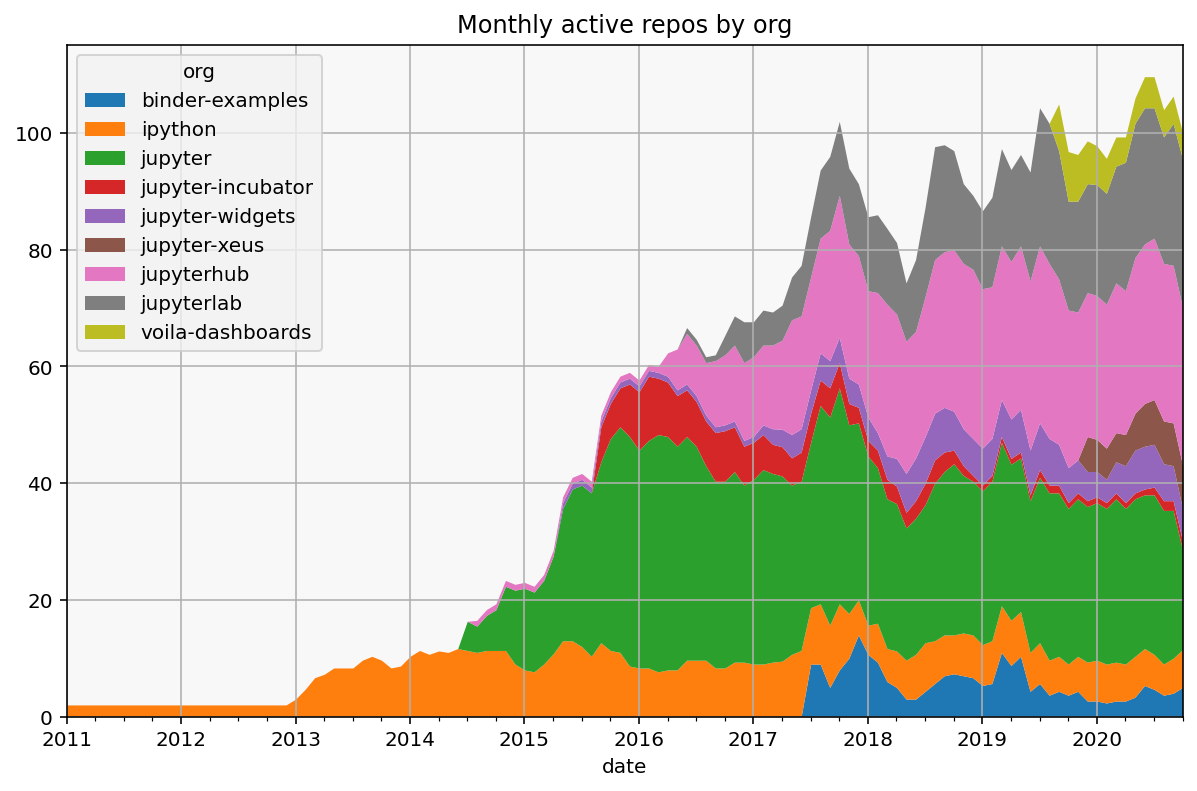

In [80]:
plot_events(
    df,
    groupby="org",
    timeseries=True,
    metric="nunique",
    column="repo_name",
    since="2011",
    smooth="90d",
)
plt.title("Monthly active repos by org")
savefig("monthly-repos")

Saved /Users/minrk/Documents/Jupyter/pres/2020/jupytercon/repo-split.pdf


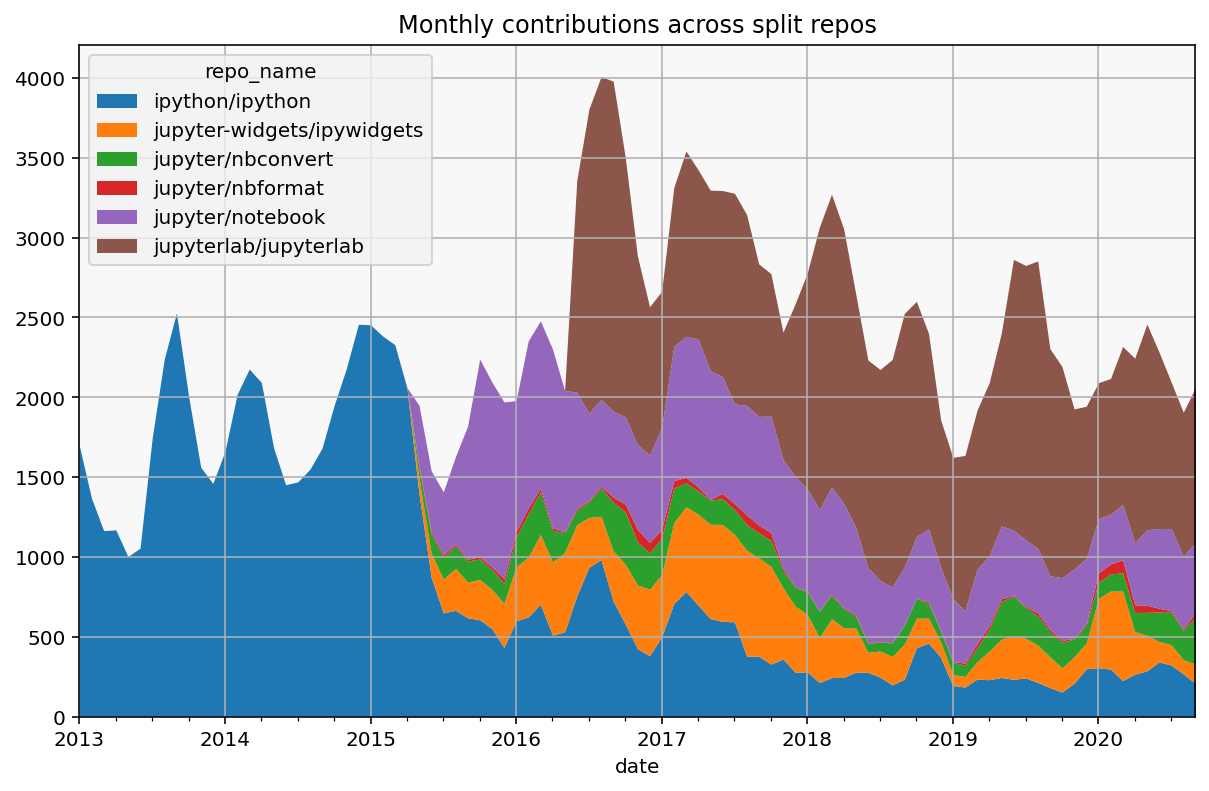

In [81]:
repos = ["ipython/ipython", "jupyter/nbconvert", "jupyter/nbformat", "jupyter/notebook", "jupyter-widgets/ipywidgets", "jupyterlab/jupyterlab"]
subset = df[df.repo_name.isin(repos)]
plot_events(subset, timeseries=True, since="2013", smooth="90d");
# grouped = subset.groupby([pd.Grouper(freq="M", key="created_at"), "repo_name"])
# grouped.actor_id.count().unstack(-1).fillna(0).plot.area(linewidth=0)
plt.title("Monthly contributions across split repos")
savefig("repo-split")

org
jupyter            12817
ipython             6878
jupyterlab          3990
jupyterhub          3947
jupyter-widgets     1399
Name: actor_id, dtype: int64

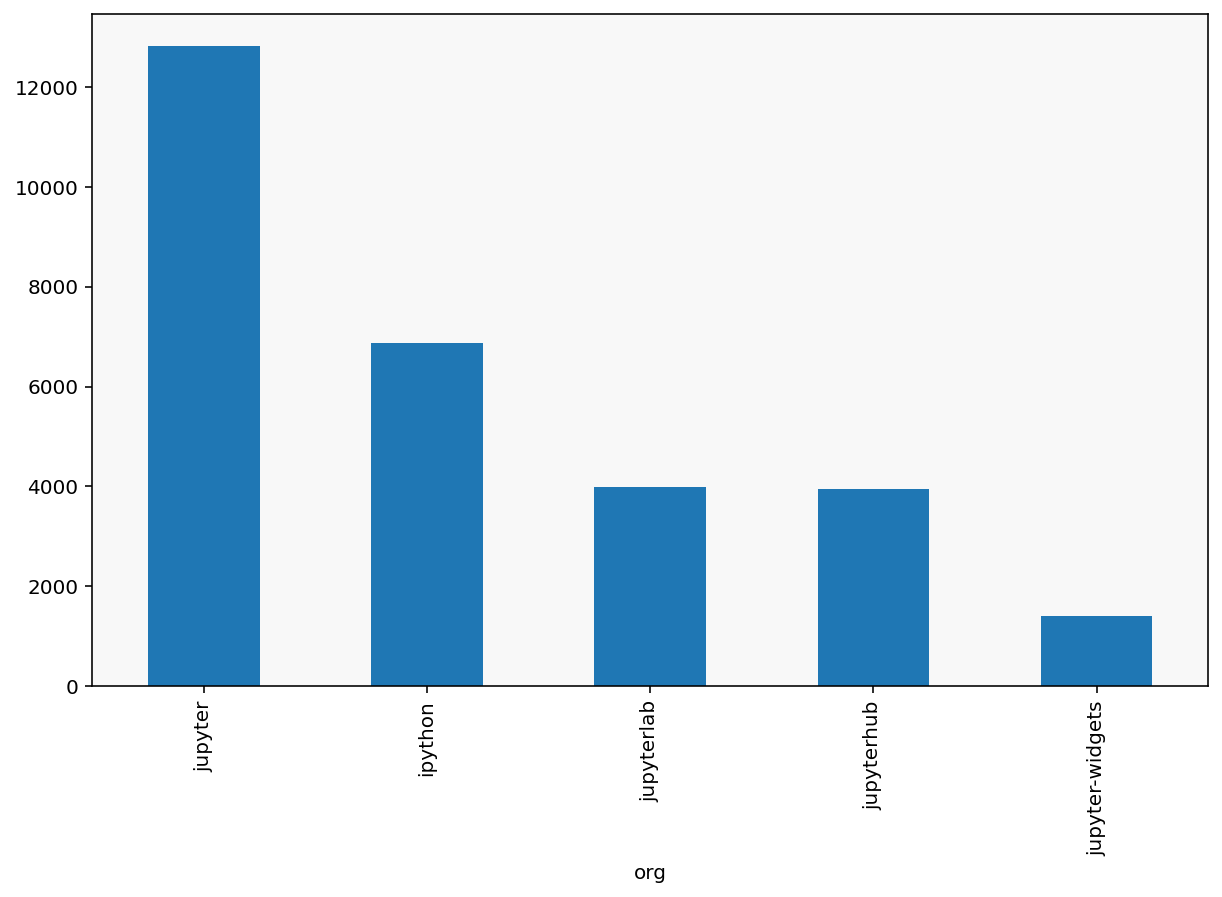

In [82]:
plot_events(df, groupby="org", metric="nunique")

Saved /Users/minrk/Documents/Jupyter/pres/2020/jupytercon/repo-counts.pdf


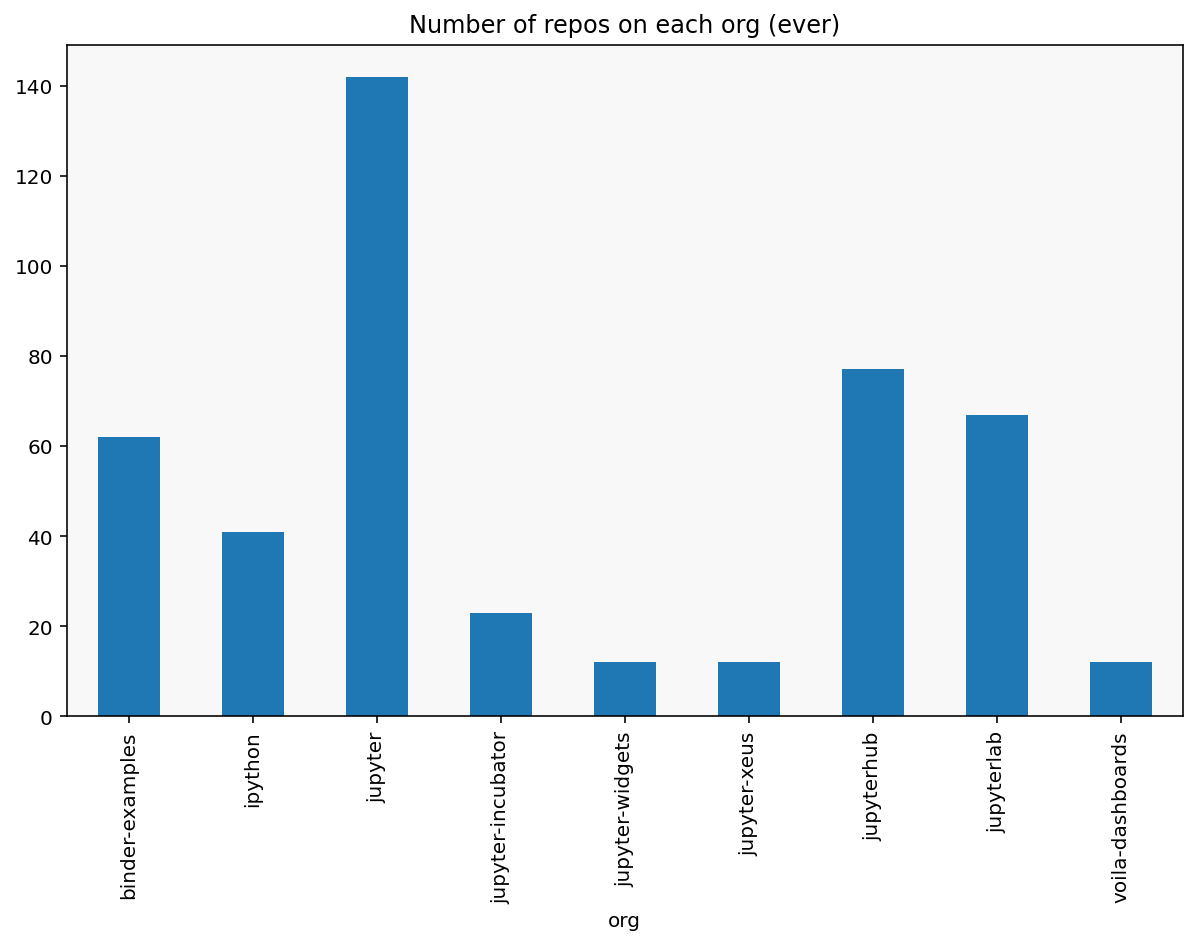

In [249]:
df.groupby("org").repo_name.nunique().plot(kind="bar")
plt.title("Number of repos on each org (ever)")
plt.grid(False)
savefig("repo-counts")

Saved /Users/minrk/Documents/Jupyter/pres/2020/jupytercon/repo-counts-2020.pdf


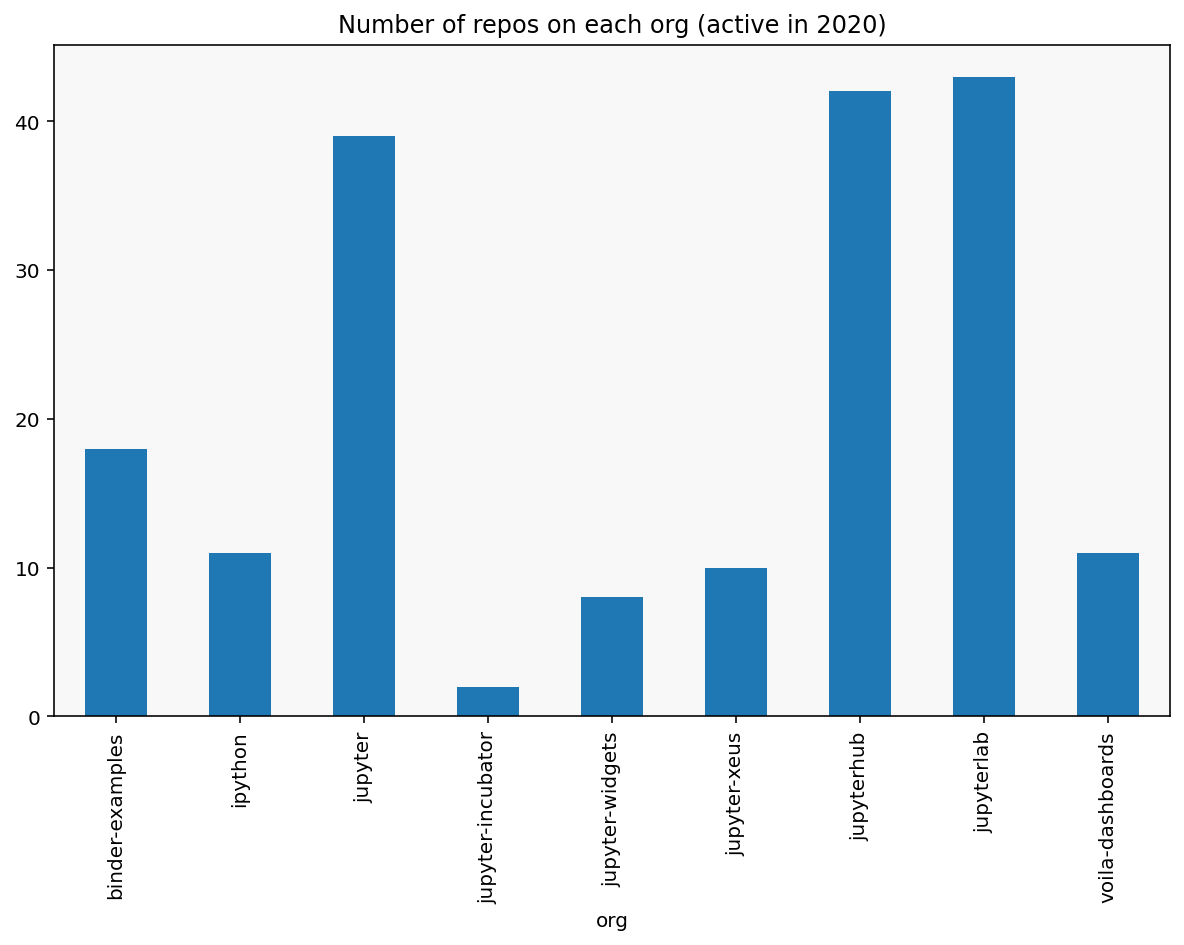

In [250]:
df[df.date.dt.year >= 2020].groupby("org").repo_name.nunique().plot(kind="bar")
plt.title("Number of repos on each org (active in 2020)")
plt.grid(False)
savefig("repo-counts-2020")

<AxesSubplot:xlabel='org'>

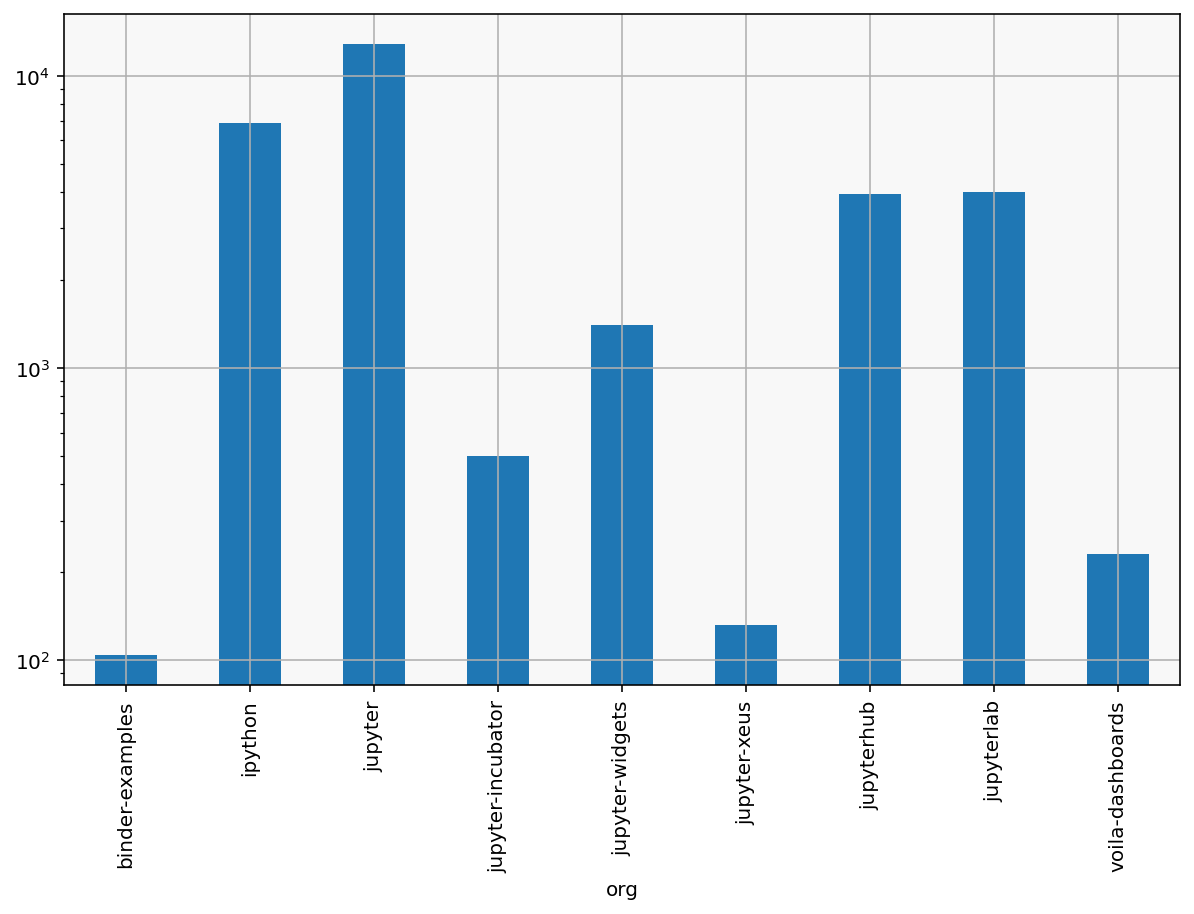

In [251]:
df.groupby("org").actor_id.nunique().plot(kind="bar", logy=True)

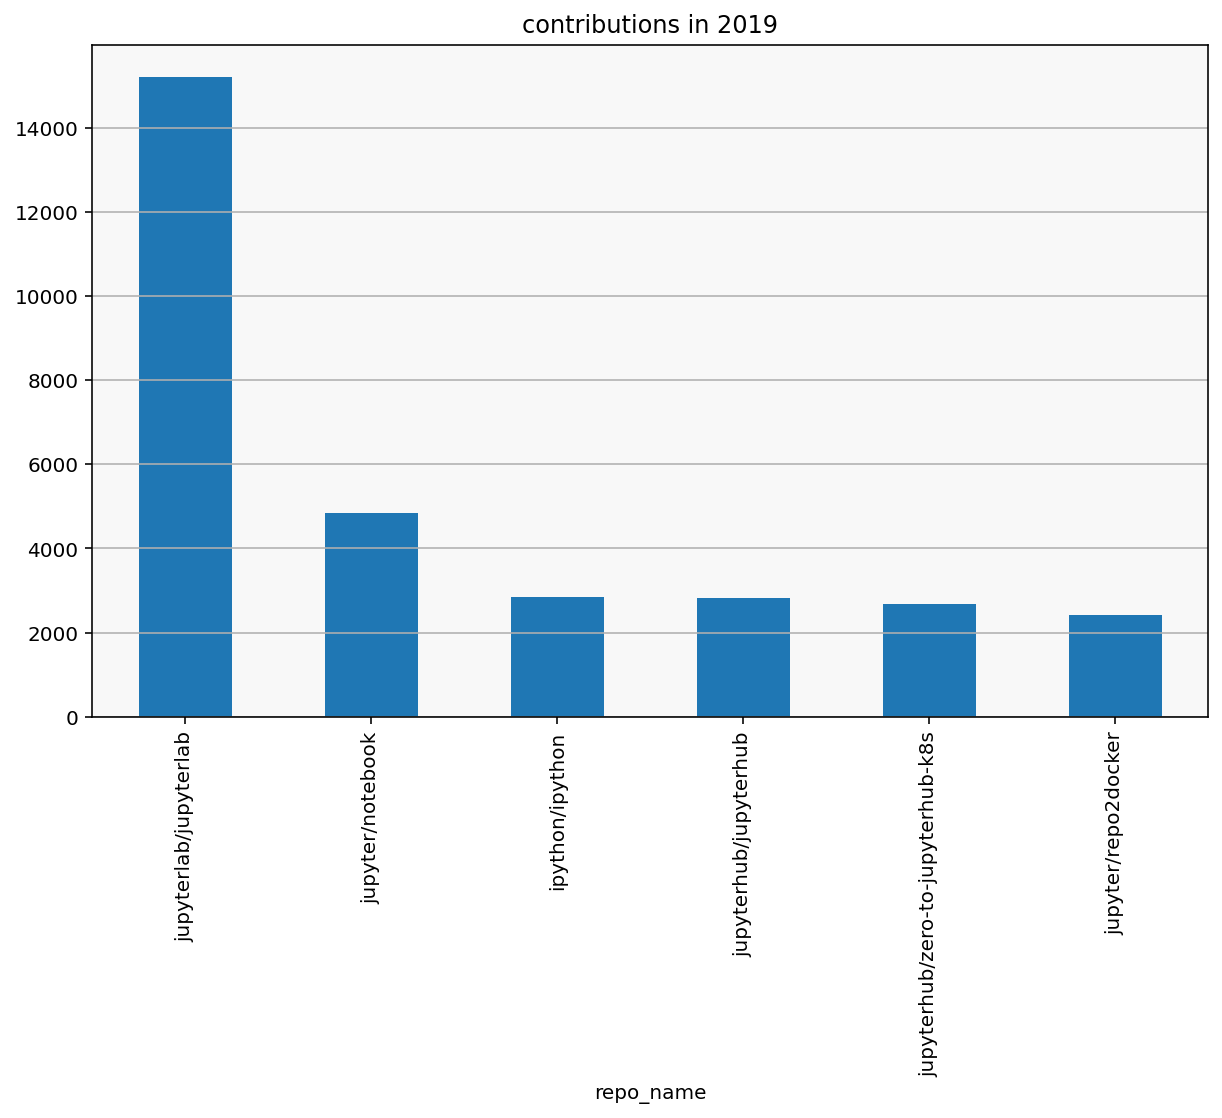

In [261]:
subset = plot_events(df, year=2019, n=6) #, logy=True)
plt.title("contributions in 2019")
repos = list(subset.index)
# plt.ylim(100, None)
plt.grid(axis="y")

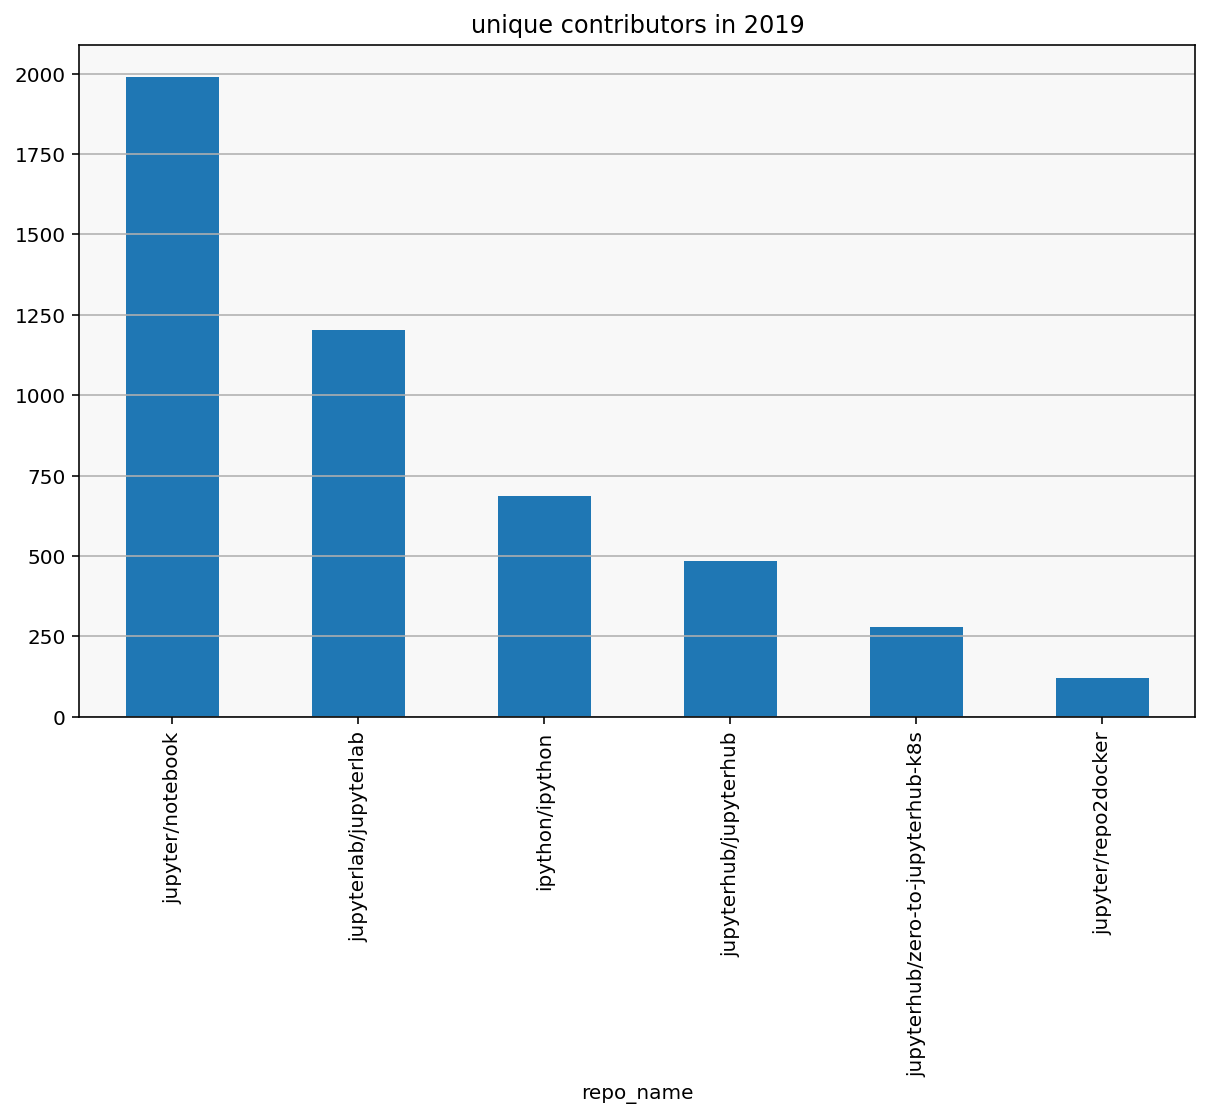

In [259]:
plot_events(df[df.repo_name.isin(repos)], year=2019, n=6, metric="nunique")
plt.title("unique contributors in 2019")
plt.grid(axis="y")


(10, 10000.0)

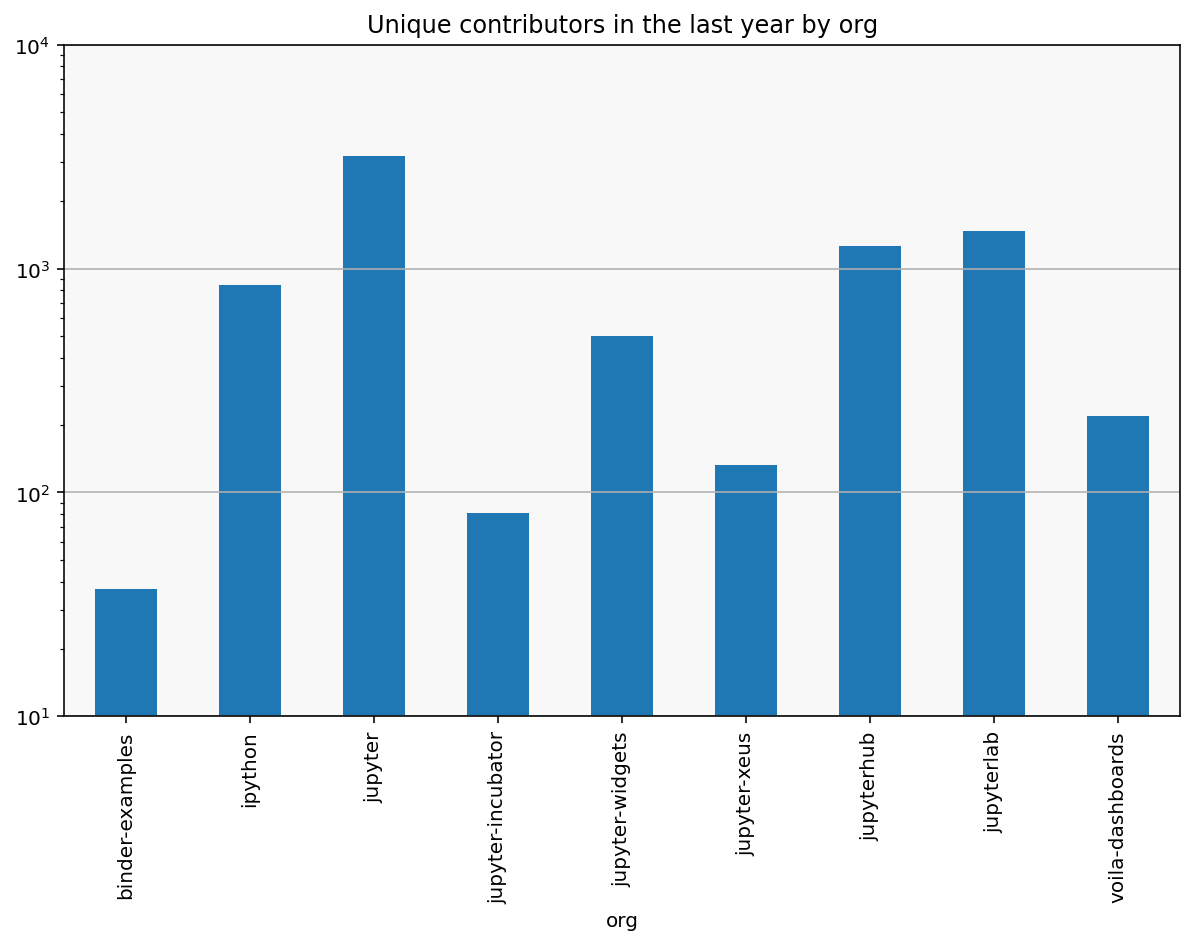

In [264]:
from datetime import datetime, timedelta, timezone
df[df.date >= datetime.now(timezone.utc) - timedelta(days=365)].groupby("org").actor_id.nunique().plot(kind="bar", logy=True)
plt.grid(axis="x")
plt.title("Unique contributors in the last year by org")
plt.ylim(10, 1e4)

org
jupyterlab         16705
jupyter            16257
jupyterhub         12083
jupyter-widgets     4849
ipython             3378
Name: actor_id, dtype: int64

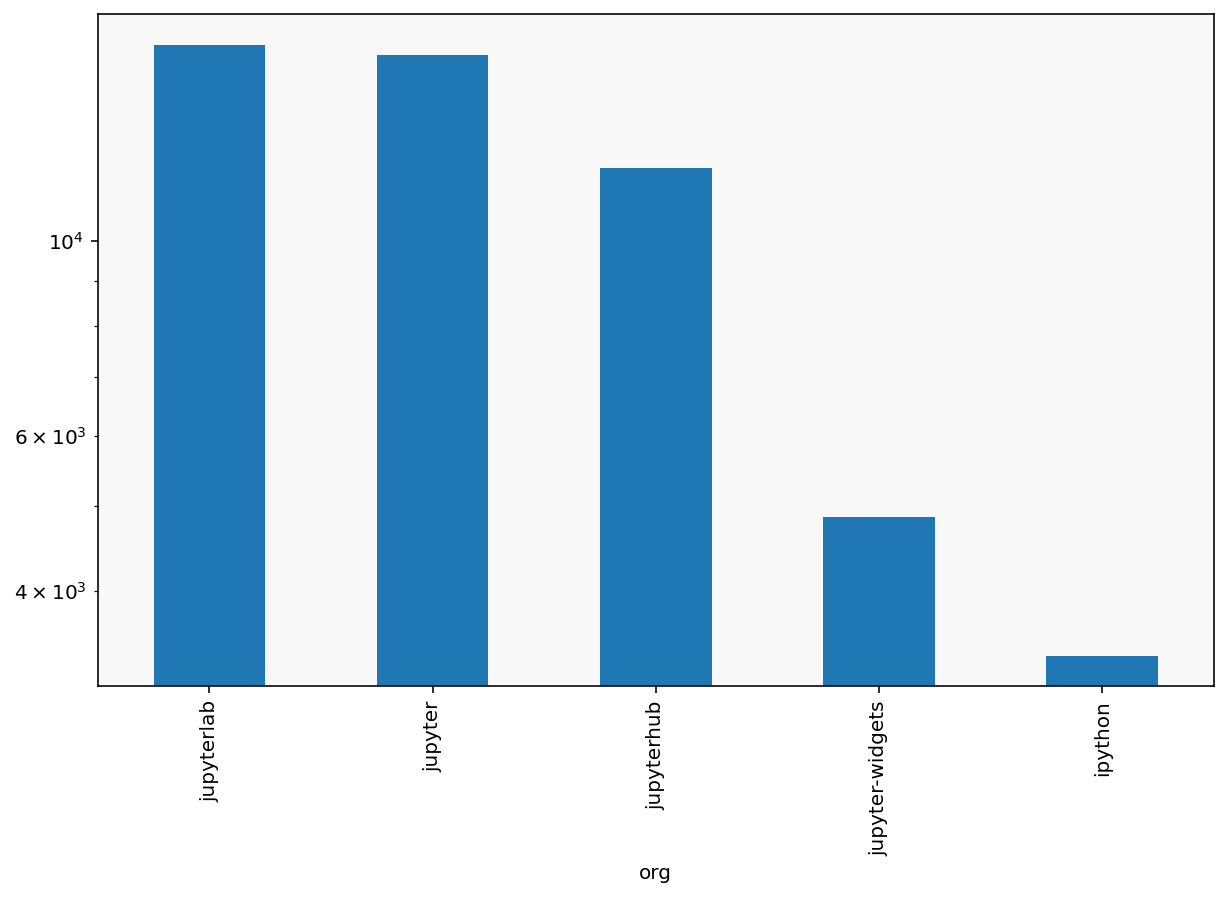

In [265]:
plot_events(df, groupby="org", year=2020, metric="count", logy=True)


repo_name
ipython/ipython                      106607
jupyterlab/jupyterlab                 64742
jupyter/notebook                      38495
jupyter-widgets/ipywidgets            20221
jupyterhub/jupyterhub                 19269
ipython/ipython-dev-list              16268
jupyter/jupyter                       12385
jupyterhub/zero-to-jupyterhub-k8s     11769
Name: actor_id, dtype: int64

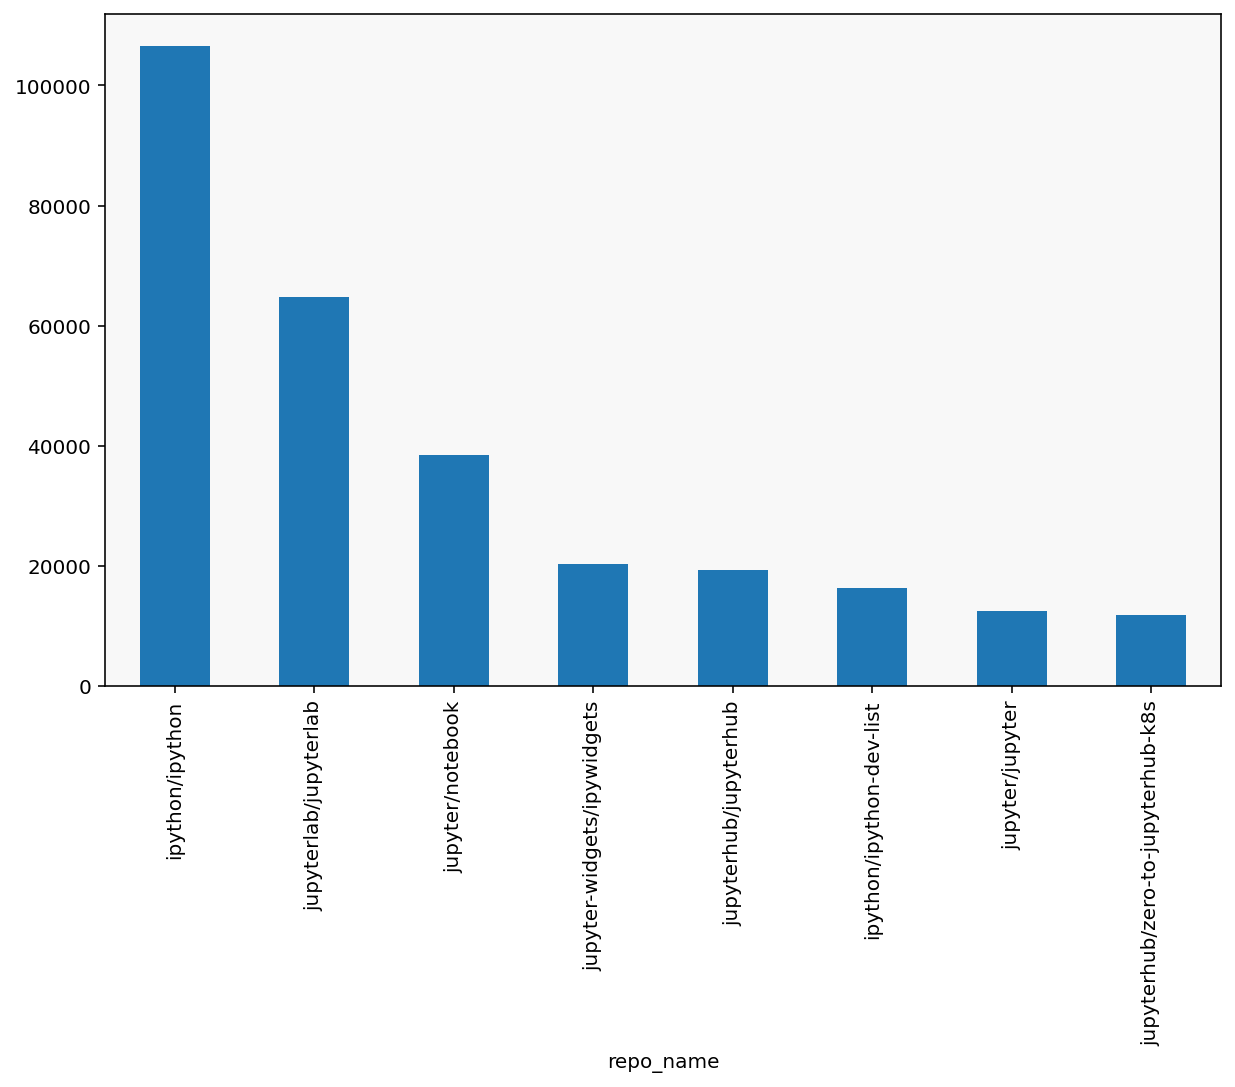

In [268]:
plot_events(df, n=8)

repo_name
jupyterlab/jupyterlab                12053
jupyter/notebook                      5069
ipython/ipython                       3227
jupyterlab/debugger                   2993
jupyter-widgets/ipywidgets            2919
jupyterhub/zero-to-jupyterhub-k8s     2716
jupyterhub/jupyterhub                 2670
jupyterhub/mybinder.org-deploy        2504
Name: actor_id, dtype: int64

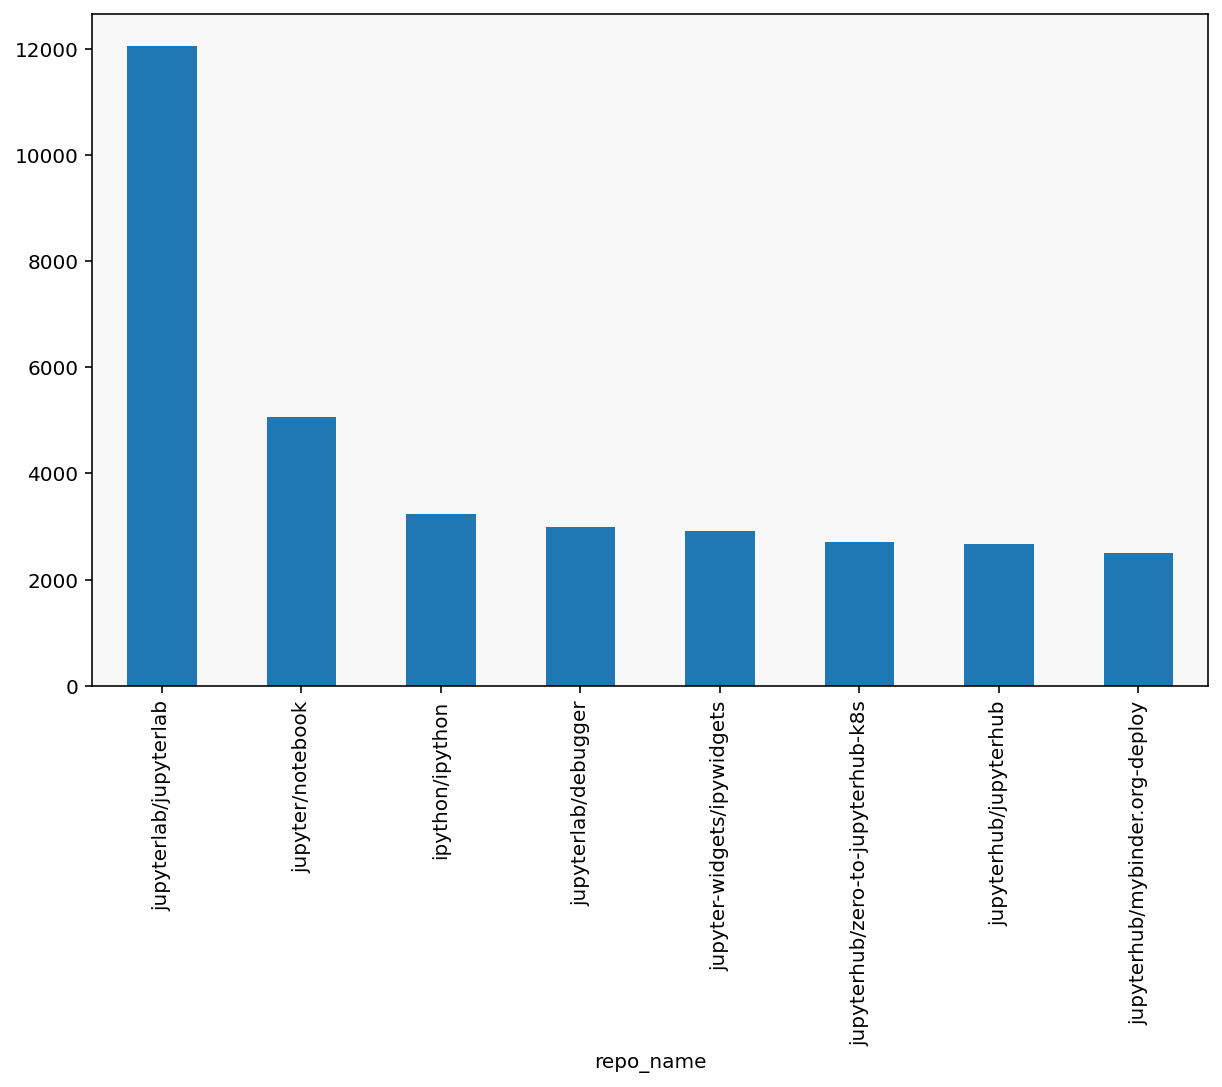

In [270]:
plot_events(df, since="2019-10-01", n=8)

jupyterhub/jupyterhub                     19269
jupyterhub/zero-to-jupyterhub-k8s         11769
jupyterhub/mybinder.org-deploy             7853
jupyterhub/binderhub                       7362
jupyterhub/team-compass                    3046
                                          ...  
jupyterhub/jupyterhub-ltiauthenticator        1
jupyterhub/jupyterlab_hub                     1
jupyterhub/simplespawner                      1
jupyterhub/jupyterhub-tmpauthenticator        1
jupyterhub/kubetools                          1
Name: repo_name, Length: 77, dtype: int64

Text(0.5, 1.0, 'Monthly unique')

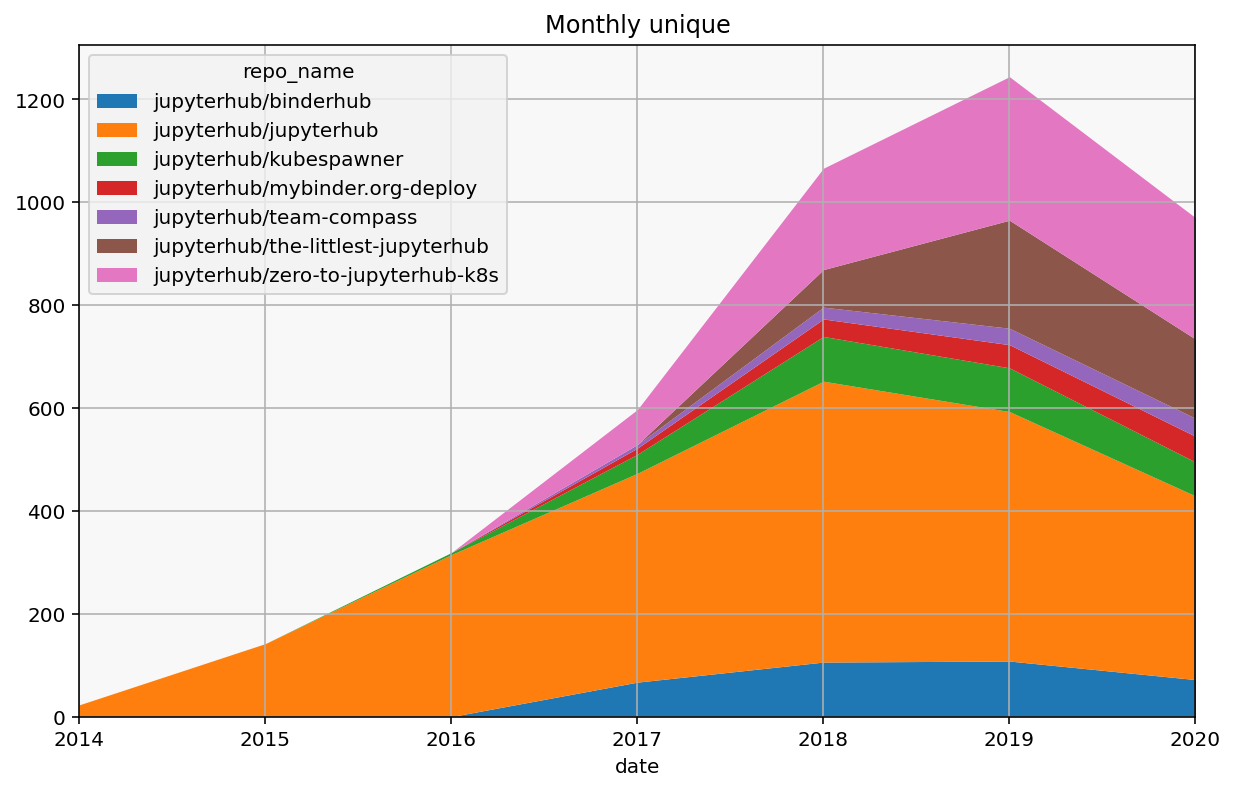

In [297]:
top_hub_repos = df[df.org=="jupyterhub"].repo_name.value_counts().index[:7]
plot_events(df[df.repo_name.isin(top_hub_repos)], freq="Y", metric="nunique", timeseries=True, smooth="90d");
plt.title("Monthly unique")

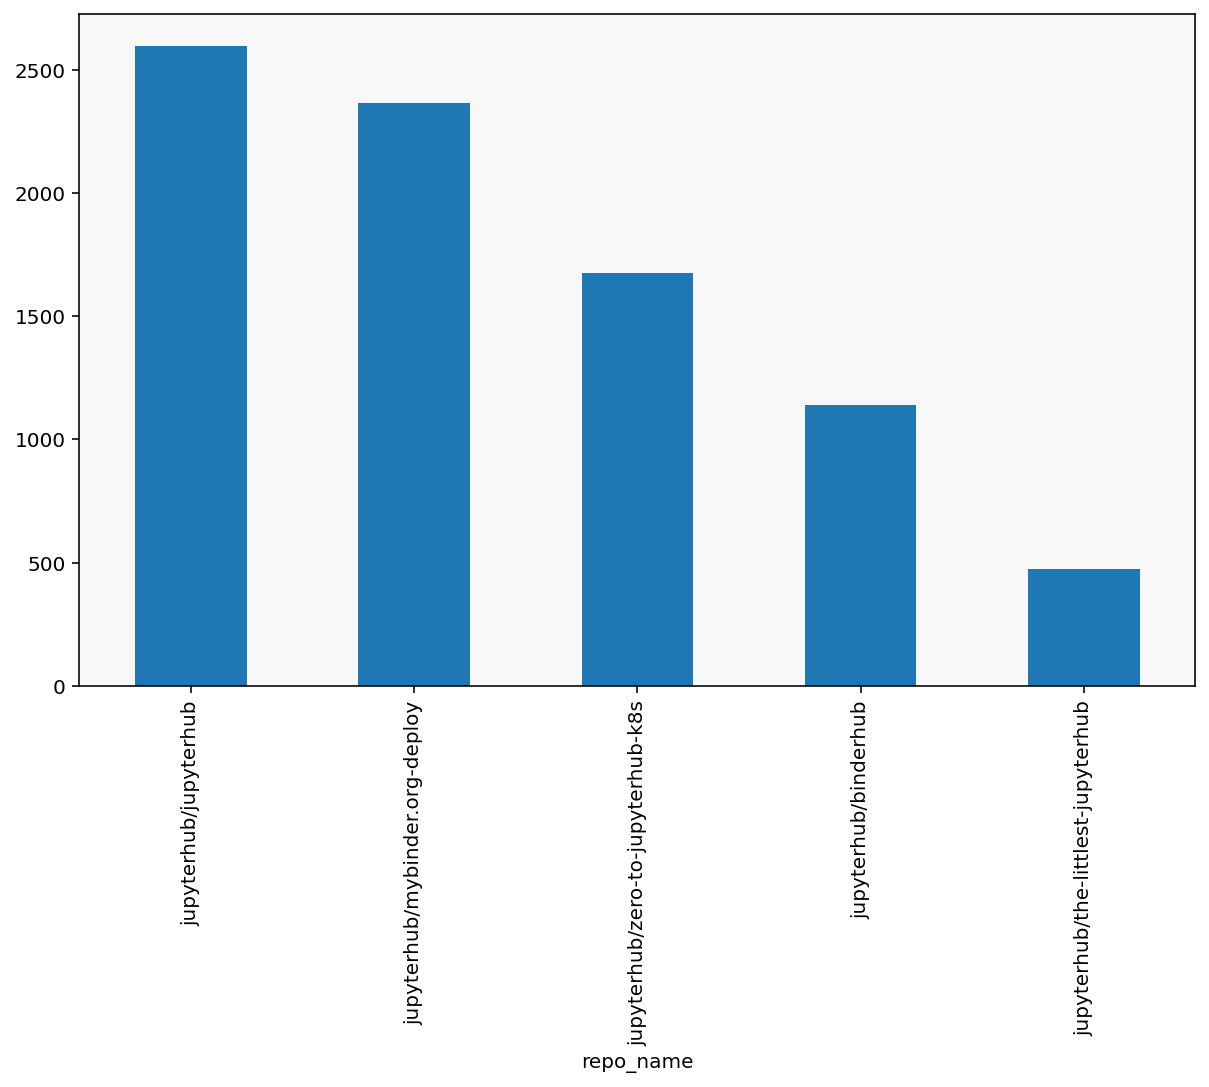

In [275]:
hub_prs = df[(df.type=="PullRequestEvent") & (df.org=="jupyterhub")]
hub_prs.groupby("repo_name").actor_id.count().nlargest(5).plot(kind="bar")
plt.grid(False)

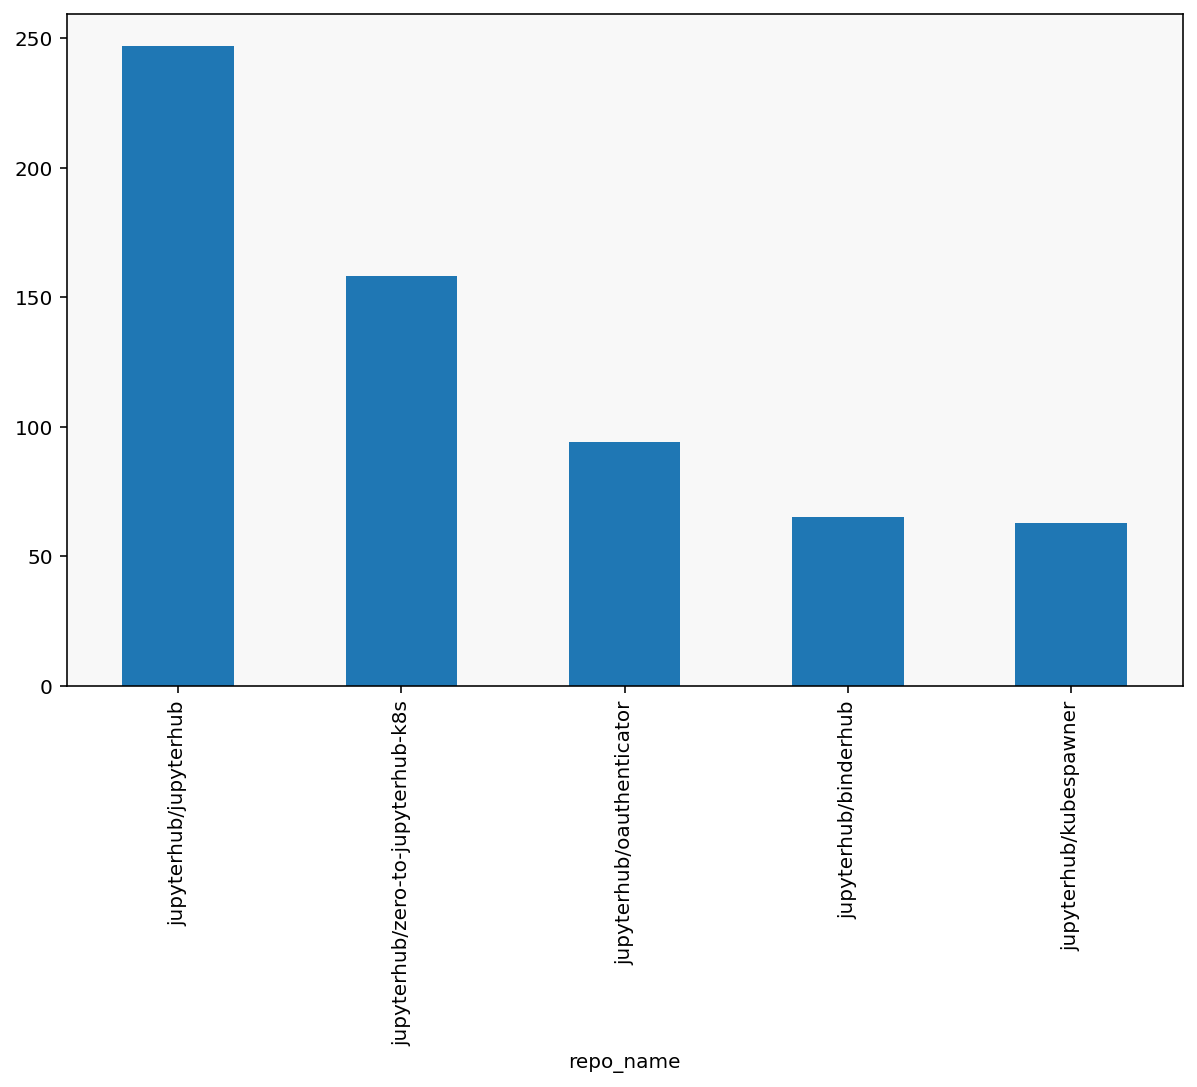

In [277]:
hub_prs.groupby("repo_name").actor_id.nunique().nlargest(5).plot(kind="bar")
plt.grid(False)

repo_name
jupyterhub/jupyterhub                19269
jupyterhub/zero-to-jupyterhub-k8s    11769
jupyterhub/mybinder.org-deploy        7853
jupyterhub/binderhub                  7362
jupyterhub/team-compass               3046
Name: actor_id, dtype: int64

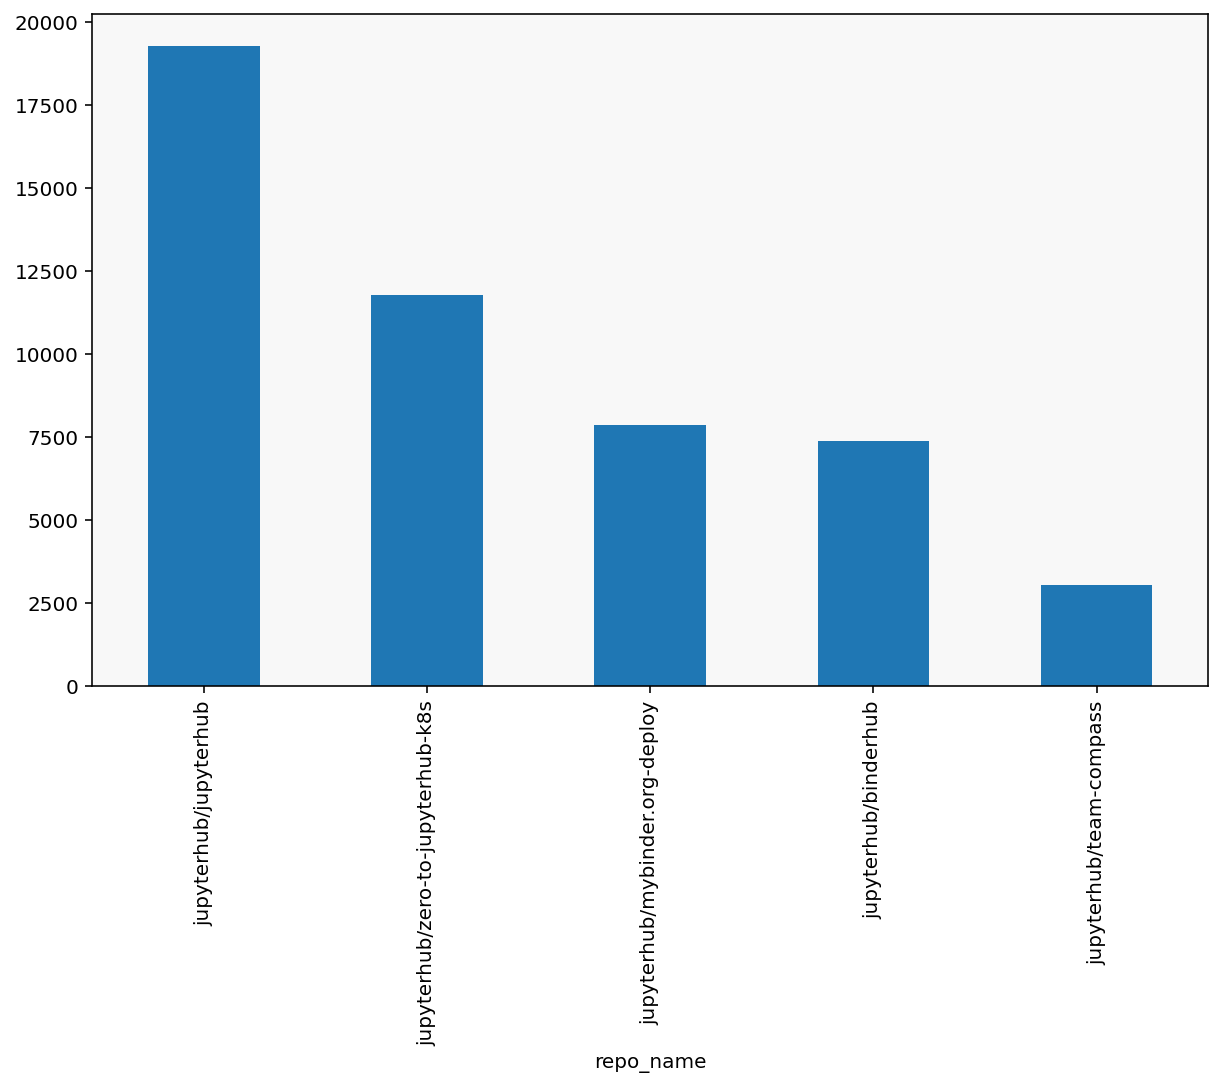

In [278]:
plot_events(df, org="jupyterhub")

repo_name
jupyterhub/jupyterhub                 2015
jupyterhub/zero-to-jupyterhub-k8s     1931
jupyterhub/mybinder.org-deploy        1826
jupyterhub/team-compass                842
jupyterhub/the-littlest-jupyterhub     726
Name: actor_id, dtype: int64

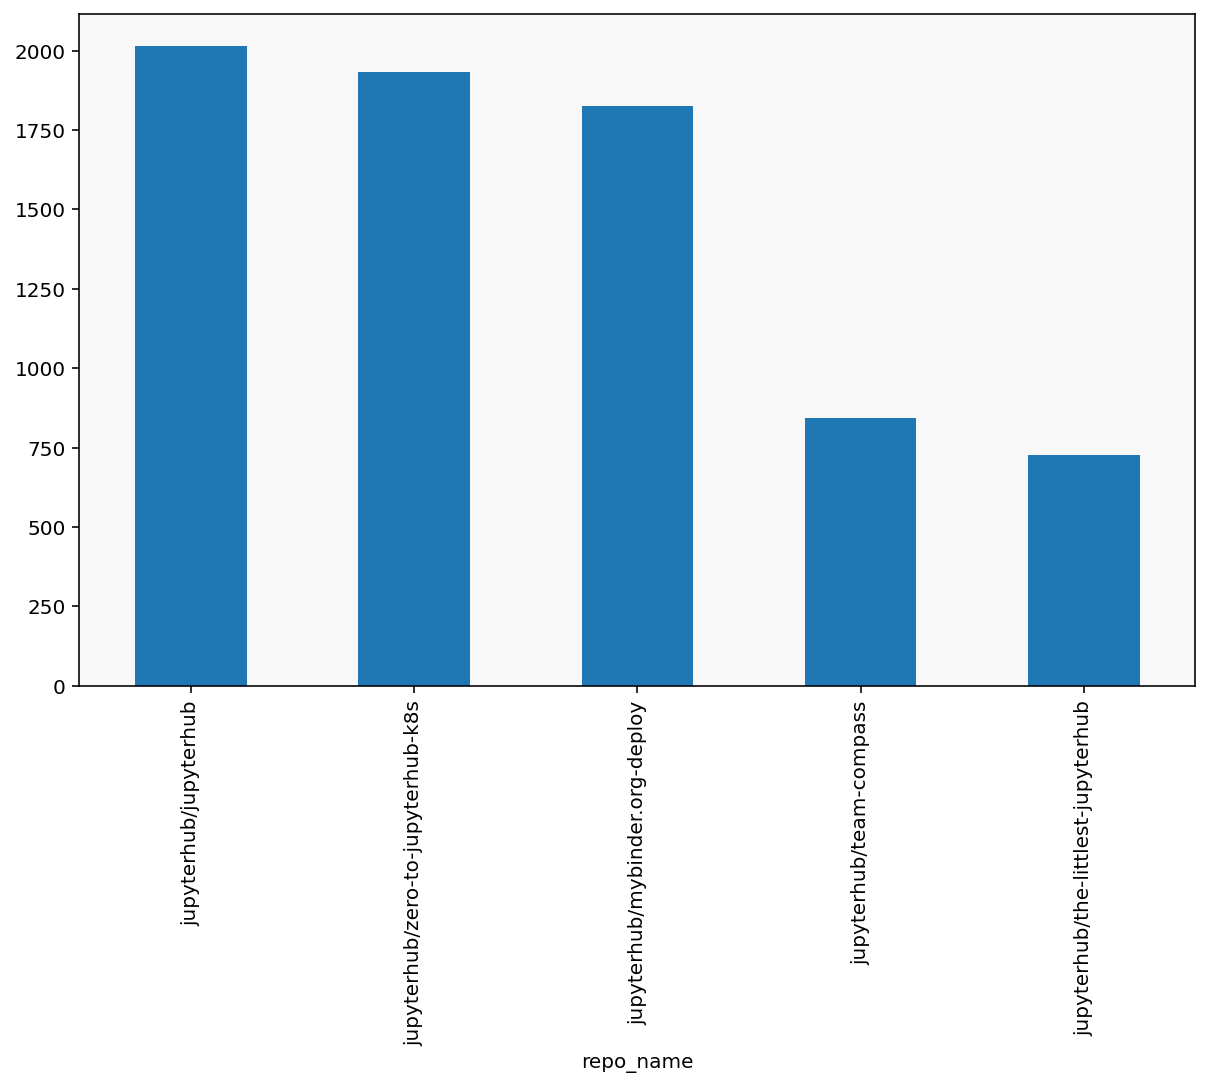

In [279]:
plot_events(df, org="jupyterhub", year=2020)

repo_name
jupyterhub/jupyterhub                 357
jupyterhub/zero-to-jupyterhub-k8s     236
jupyterhub/the-littlest-jupyterhub    154
jupyterhub/binderhub                   72
jupyterhub/kubespawner                 66
Name: actor_id, dtype: int64

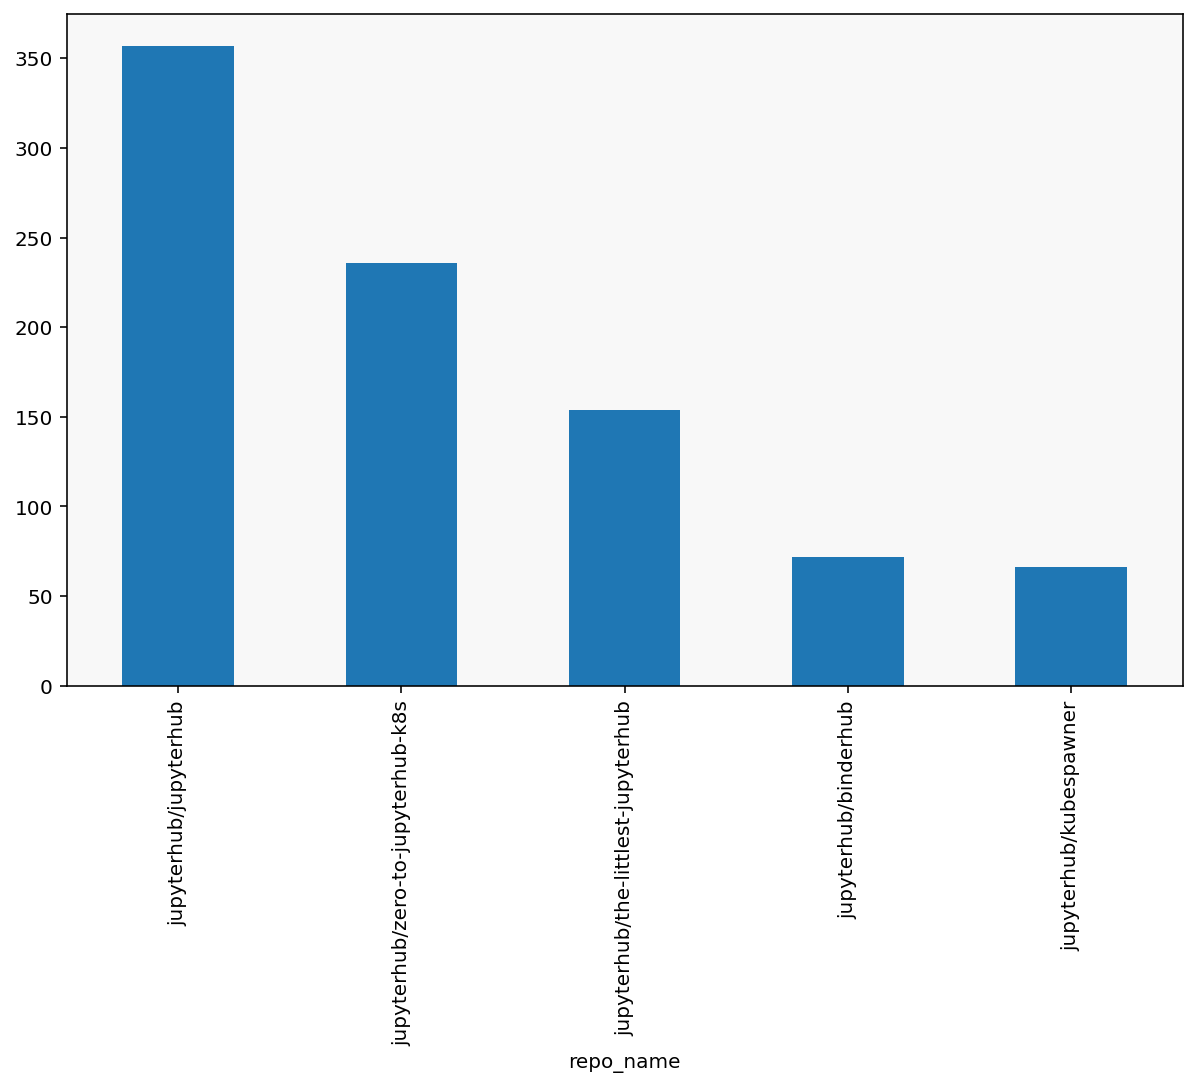

In [281]:
plot_events(df, org="jupyterhub", year=2020, metric="nunique")

repo_name
jupyterhub/mybinder.org-deploy        445
jupyterhub/zero-to-jupyterhub-k8s     268
jupyterhub/jupyterhub                 257
jupyterhub/the-littlest-jupyterhub    119
jupyterhub/binderhub                  118
Name: actor_id, dtype: int64

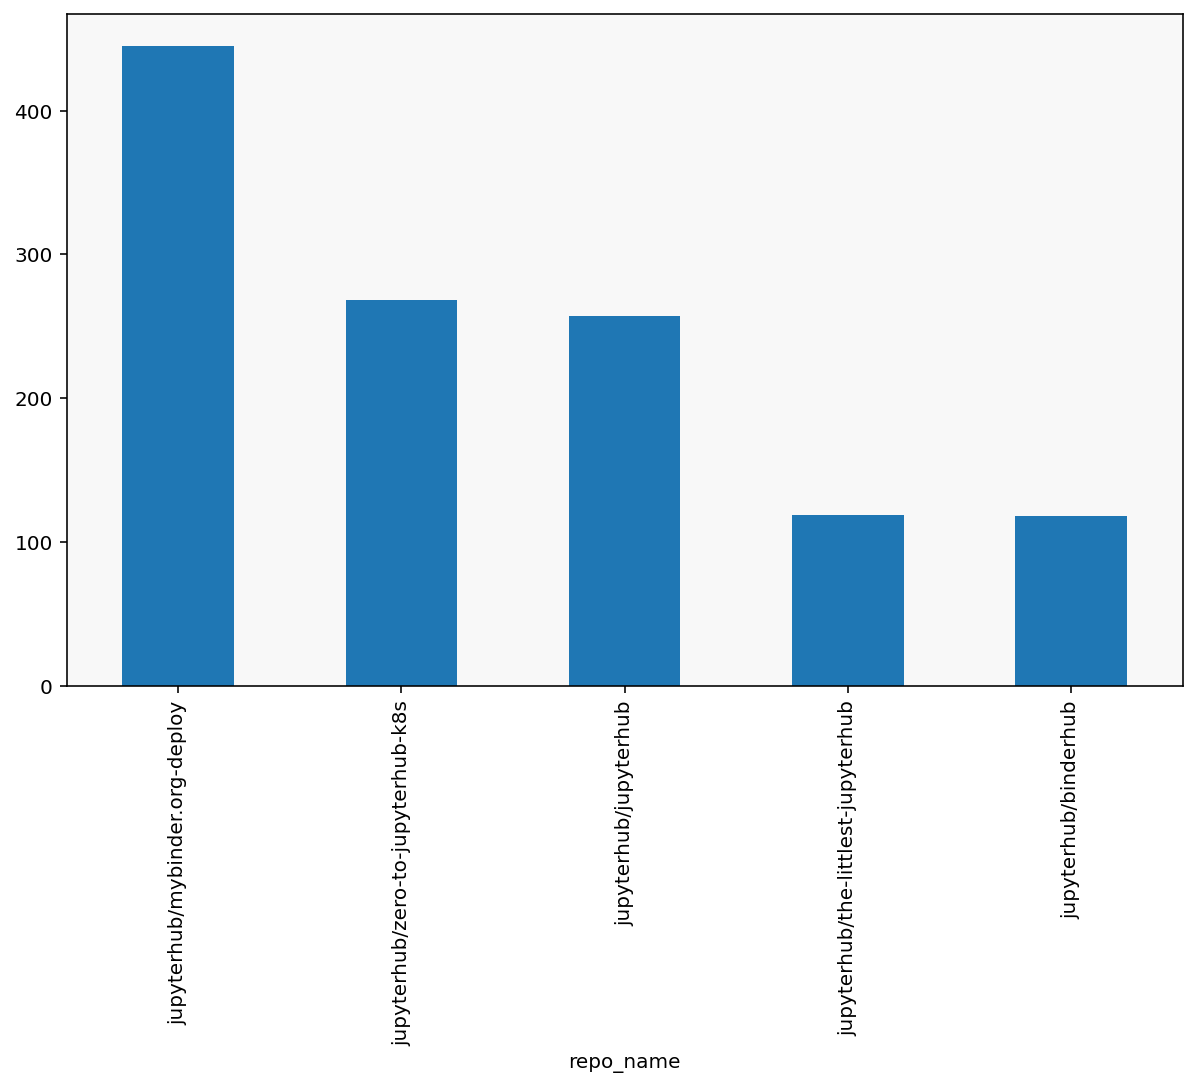

In [283]:
plot_events(df, events="PullRequestEvent", org="jupyterhub", year=2020)

<AxesSubplot:xlabel='repo_name'>

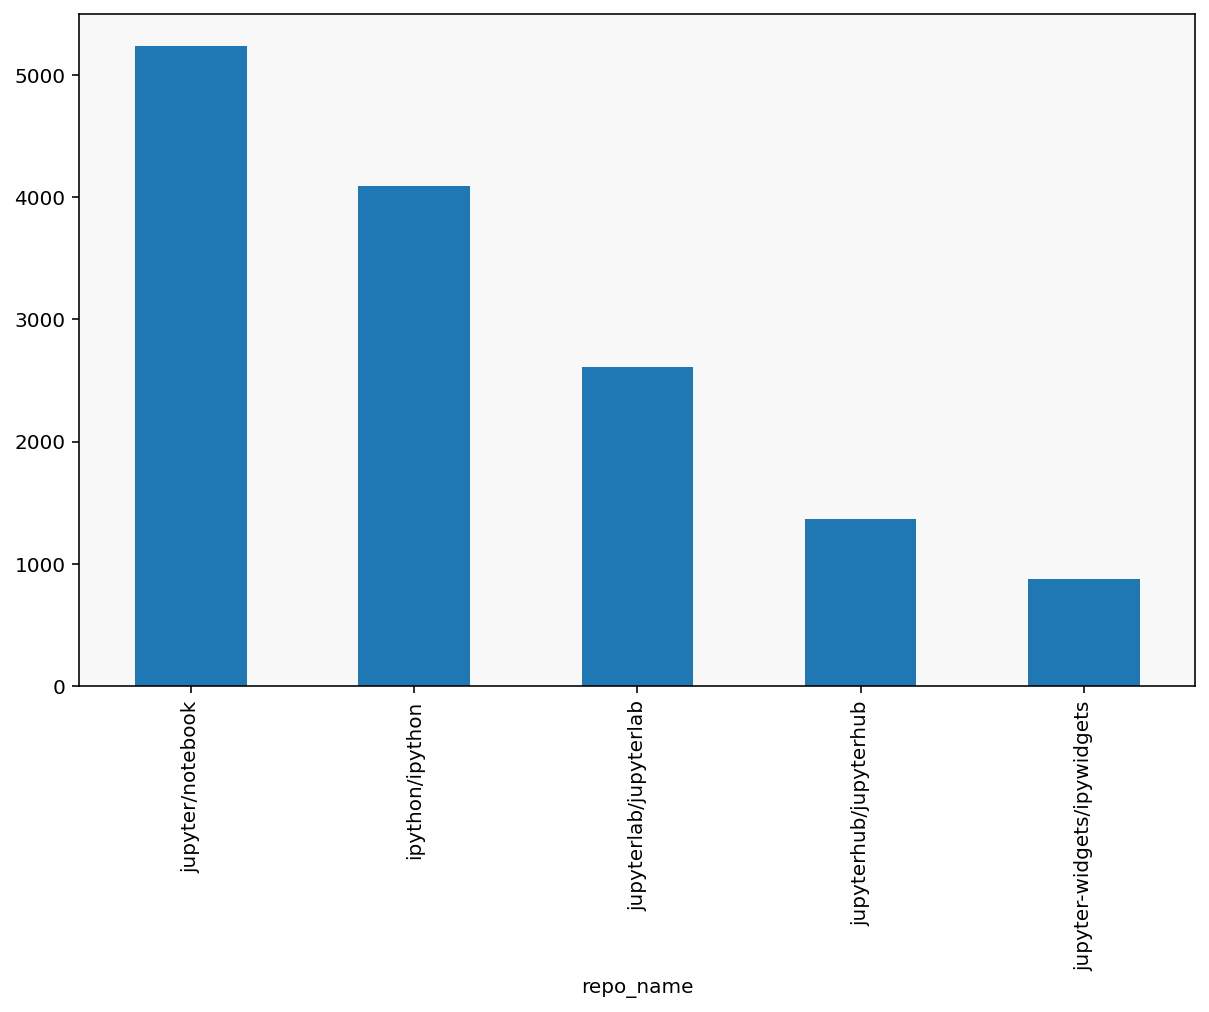

In [687]:
df[df.type.str.contains("Comment")].groupby("repo_name").actor_id.nunique().nlargest(5).plot(kind="bar")

<AxesSubplot:>

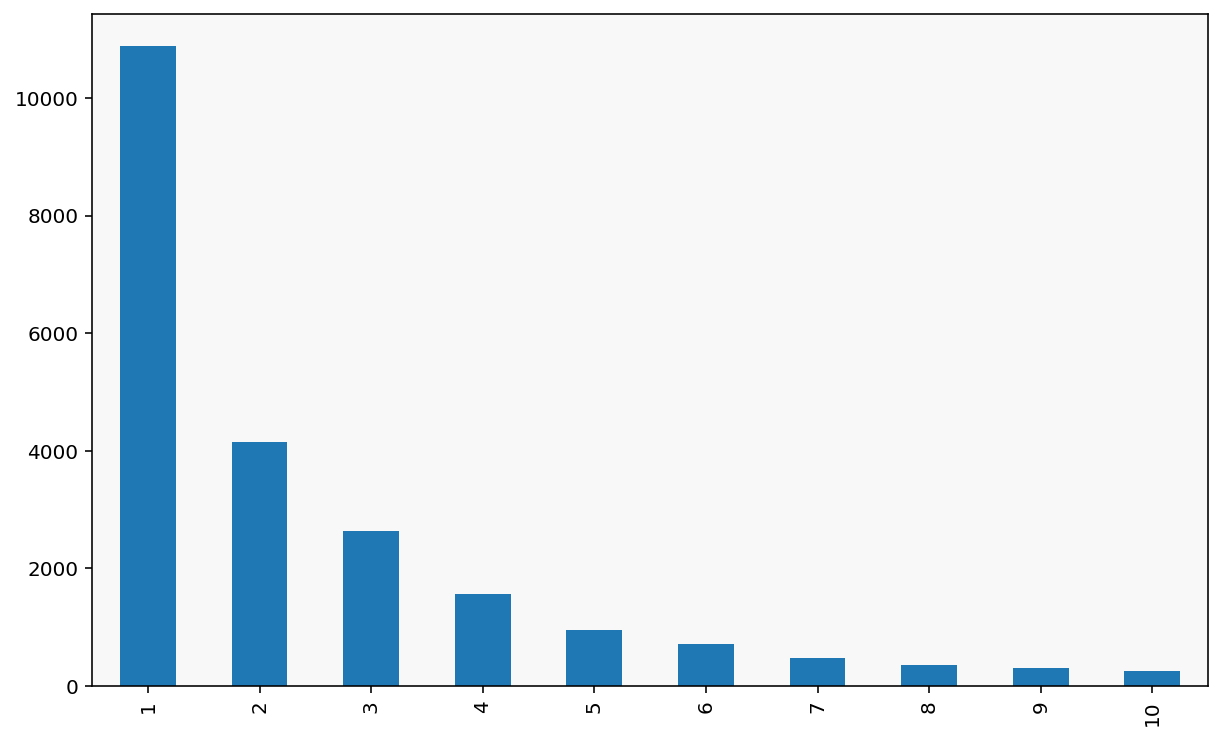

In [685]:
contribution_counts = df.actor_id.value_counts()
contribution_counts.value_counts()[:10].plot(kind="bar")

In [686]:
flyby = contribution_counts[contribution_counts <= 2]
flyby

52304911    2
1270688     2
1757241     2
43095038    2
10358254    2
           ..
15211272    1
72163395    1
30146938    1
400114      1
17461326    1
Name: actor_id, Length: 15027, dtype: Int64

In [ ]:
df[df.actor_id.isin(flyby.index)].type.value_counts()

In [38]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
gr

Saved /Users/minrk/Documents/Jupyter/pres/2020/jupytercon/by-event-unique.pdf
Saved /Users/minrk/Documents/Jupyter/pres/2020/jupytercon/by-event-count.pdf


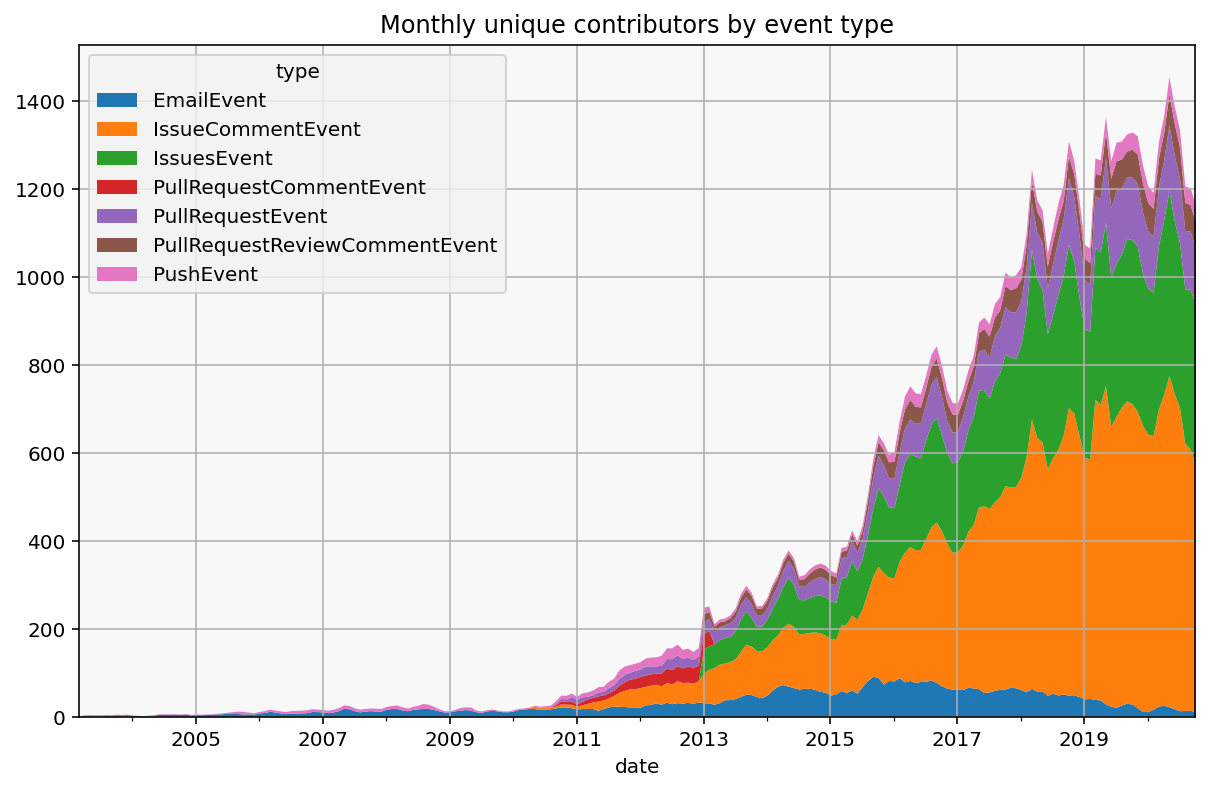

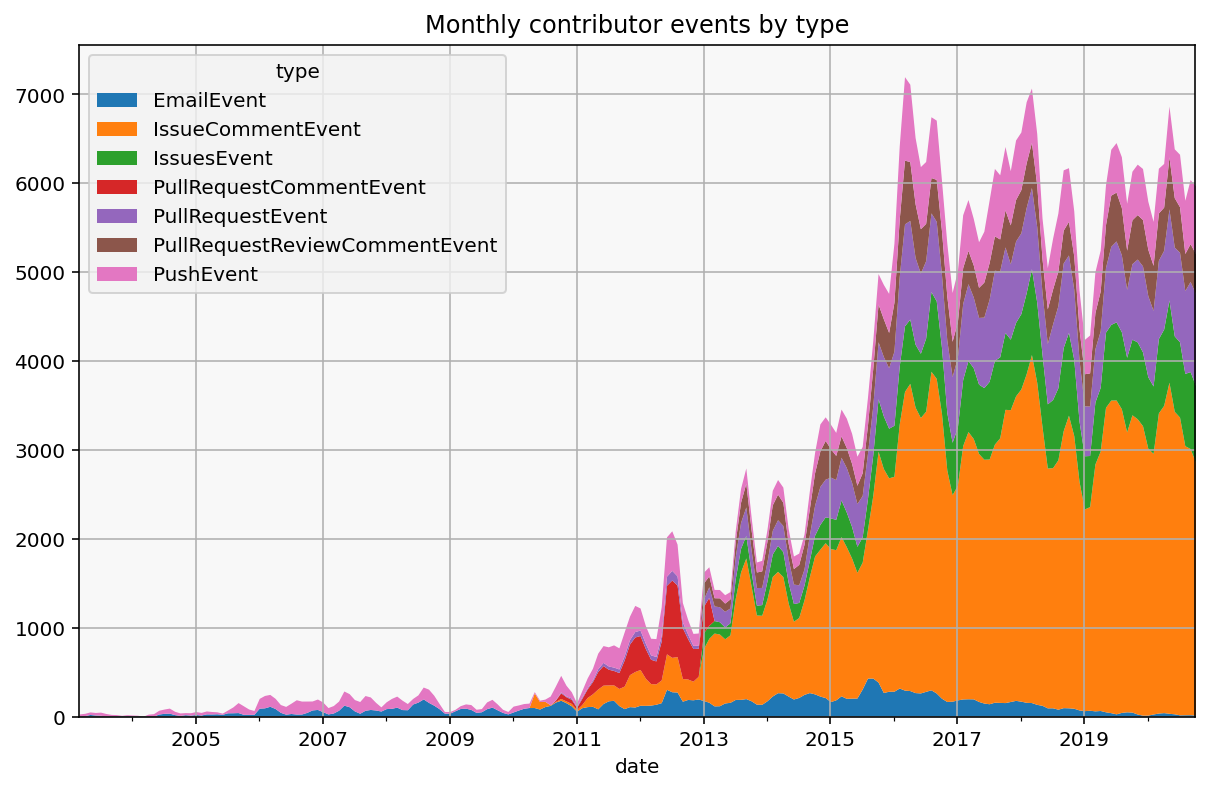

In [83]:
events = df.type.value_counts().index[:7]
subset = df[df.type.isin(events)]
grouped = subset.groupby([pd.Grouper(freq="M", key="date"), "type"])
grouped.actor_id.nunique().unstack(-1).rolling("90d").mean().plot.area(linewidth=0)
plt.title("Monthly unique contributors by event type")
savefig("by-event-unique")
grouped.actor_id.count().unstack(-1).rolling("90d").mean().plot.area(linewidth=0)
plt.title("Monthly contributor events by type")
savefig("by-event-count")


<AxesSubplot:xlabel='date'>

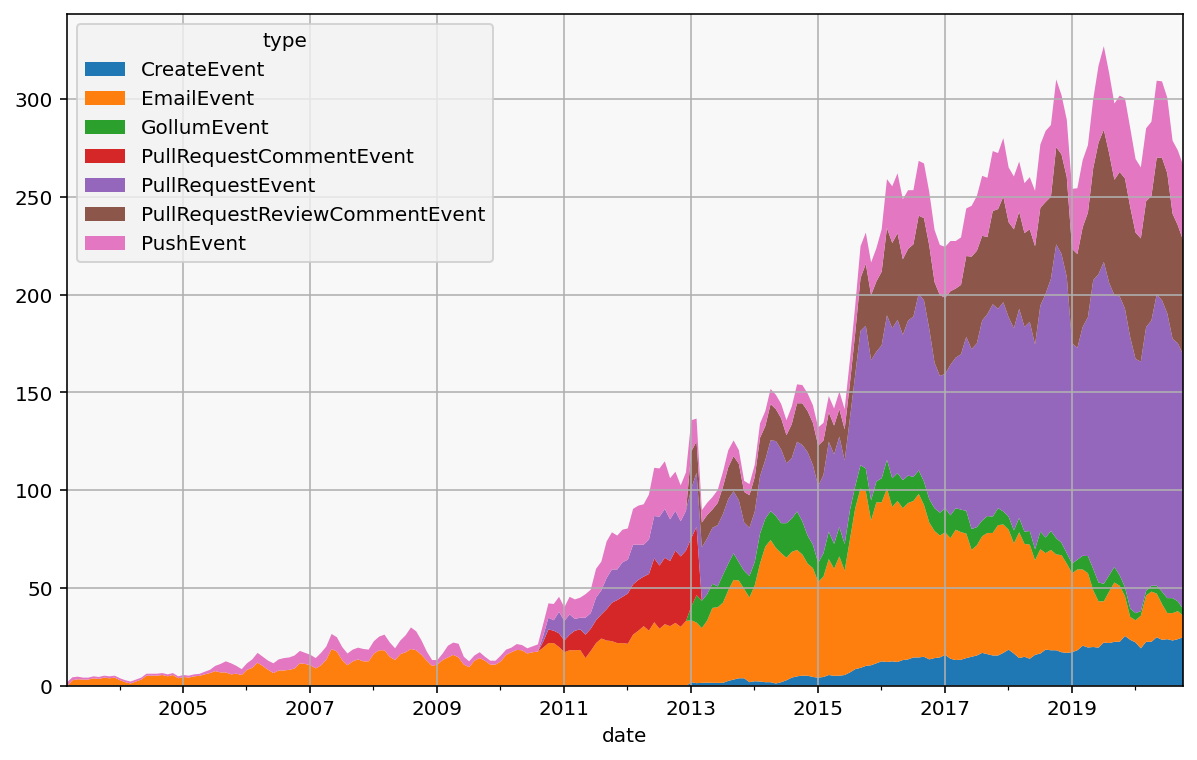

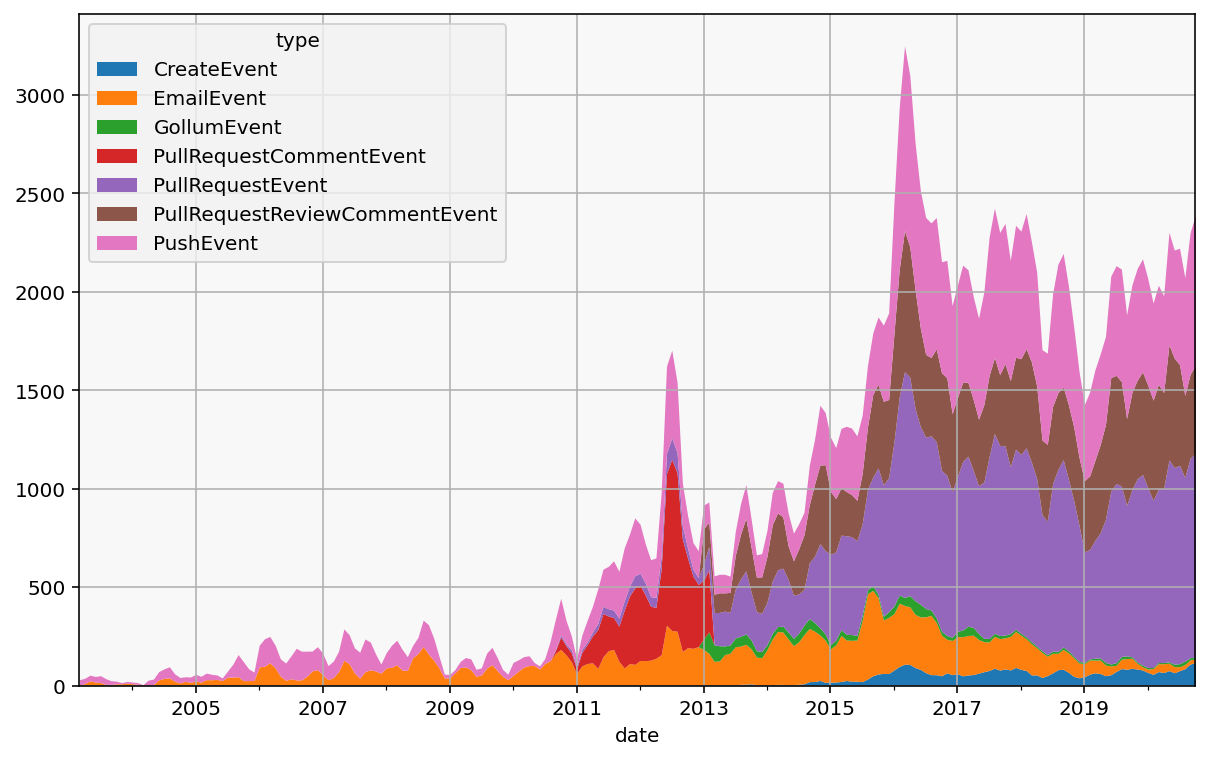

In [287]:
without_issues = df[~df.type.str.contains("Issue")]
events = without_issues.type.value_counts().index[:7]
subset = df[df.type.isin(events)]
grouped = subset.groupby([pd.Grouper(freq="M", key="date"), "type"])
grouped.actor_id.nunique().unstack(-1).rolling("90d").mean().plot.area(linewidth=0)
grouped.actor_id.count().unstack(-1).rolling("90d").mean().plot.area(linewidth=0)

In [ ]:
events = df.type.value_counts().index[:7]
subset = df[df.type.isin(events)]
grouped = subset.groupby([pd.Grouper(freq="M", key="created_at"), "type"])
grouped.actor_id.nunique().unstack(-1).rolling("90d").mean().plot.area(linewidth=0)

<AxesSubplot:xlabel='date'>

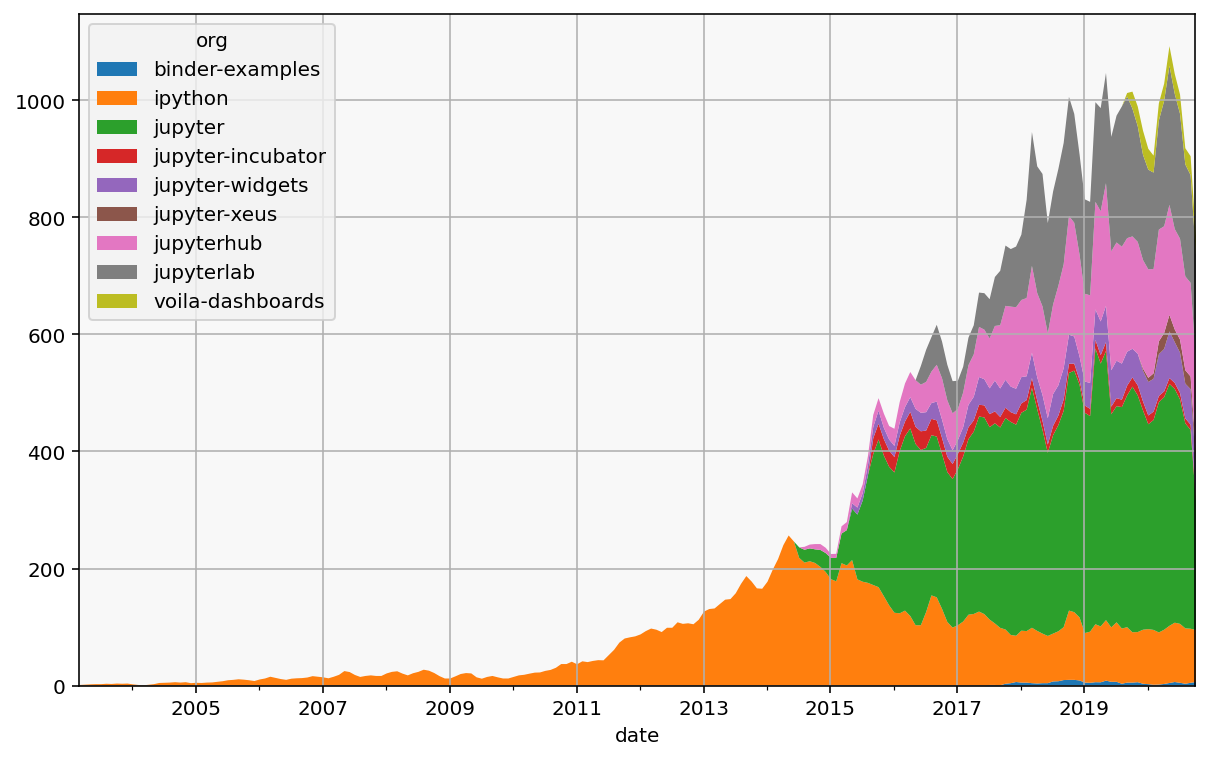

In [92]:
grouped = df.groupby([pd.Grouper(freq="M", key="date"), "org"])
grouped.actor_id.nunique().unstack(-1).rolling("90d").mean().plot.area(linewidth=0)


In [ ]:
monthly = [pd.Grouper(freq="M", key="date")]
unique_by_month = df.groupby(monthly).unique()
unique_by_mo

In [ ]:
hub_actual = df[df.repo_name=="jupyterhub/jupyterhub"]
hub_actual.resample("30d", on="created_at").actor_id.nunique().rolling("90d").mean().plot()

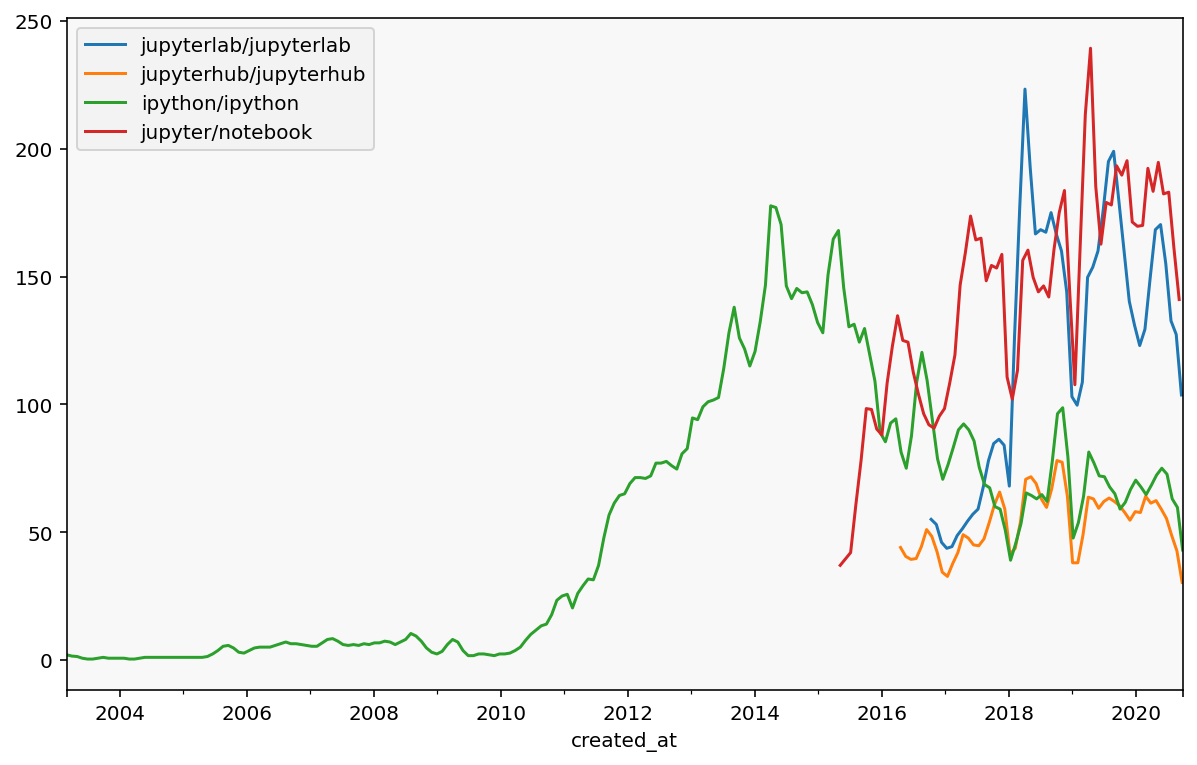

In [684]:
for repo in ["jupyterlab/jupyterlab", "jupyterhub/jupyterhub", "ipython/ipython", "jupyter/notebook"]:
    per_repo = df[df.repo_name==repo]
    per_repo.resample("30d", on="created_at").actor_id.nunique().rolling("90d").mean().plot(label=repo)
plt.legend()

<AxesSubplot:xlabel='created_at'>

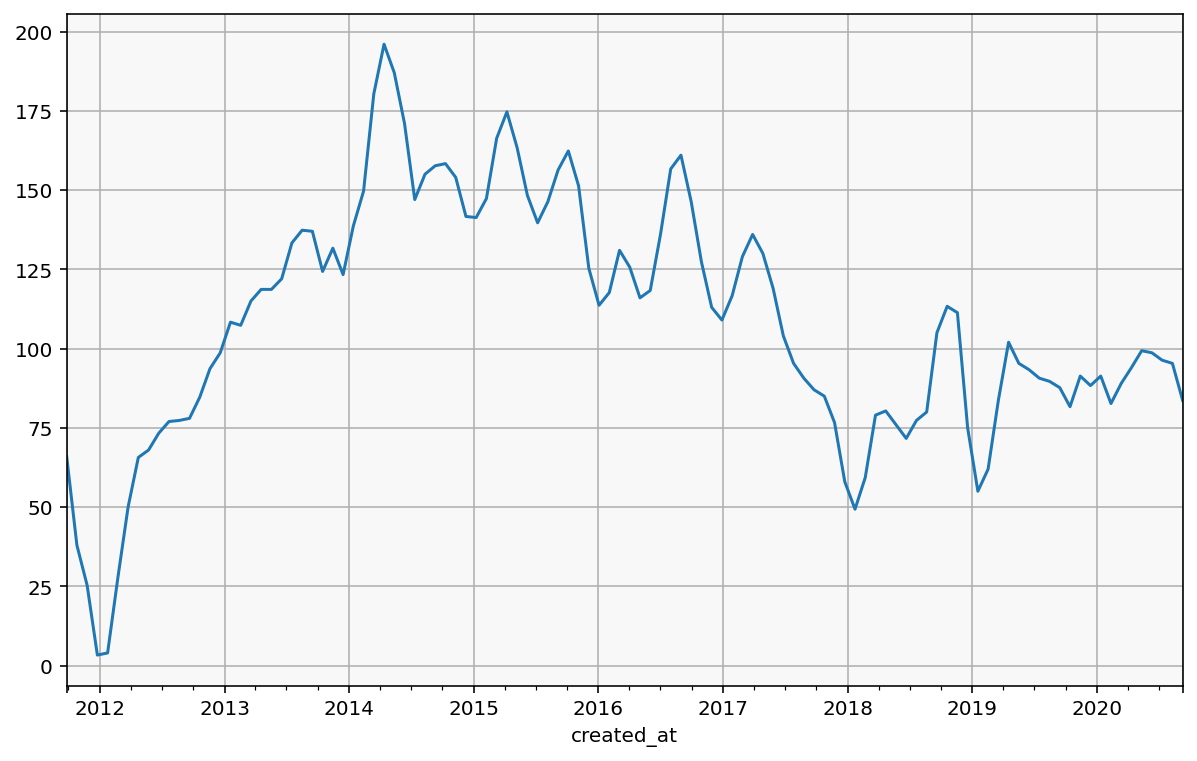

In [82]:
df[df.org=="ipython"].resample("30d", on="created_at").actor_id.nunique().rolling("90d").mean().plot()

In [674]:
df.actor_login.value_counts()[:10]

minrk         45069
takluyver     26847
Carreau       25859
blink1073     25858
jasongrout    22085
ellisonbg     15420
yuvipanda     10147
willingc       9630
parente        9487
choldgraf      9183
Name: actor_login, dtype: int64

In [676]:
from itertools import chain

bins = list(chain(range(10), np.logspace(1, 4, 100)))
counts, _ = np.histogram(df.actor_id.value_counts(), bins=bins)
counts[:5]

array([    0, 10879,  4148,  2629,  1569])

478079

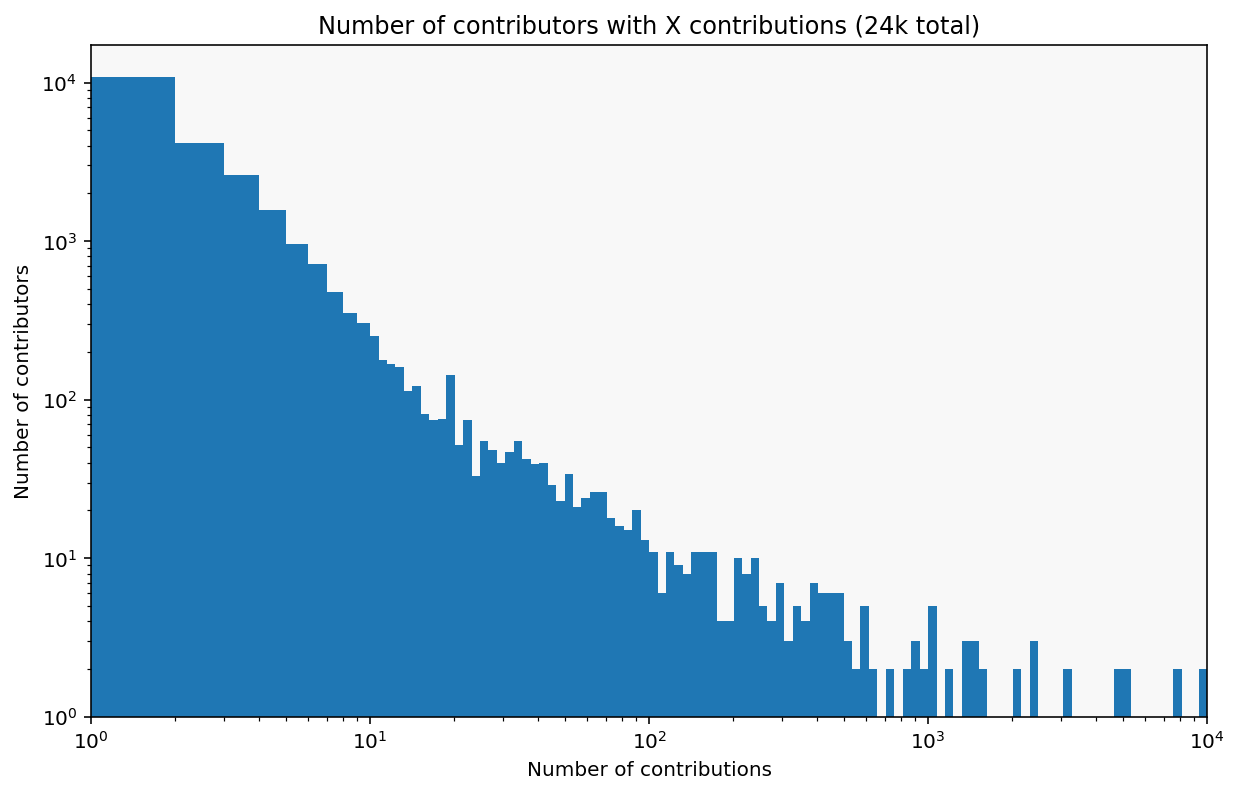

In [683]:

fig, ax = plt.subplots()
df.actor_id.value_counts().plot(
    kind="hist",
    bins=bins,
    ax=ax,
    cumulative=0,
)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel("Number of contributors")
ax.set_xlabel("Number of contributions")
ax.set_title(f"Number of contributors with X contributions ({df.actor_id.nunique()//1000}k total)")
ax.set_xlim(1, bins[-1])
ax.set_ylim(1, None)
len(df)

(1, 39093.10050313296)

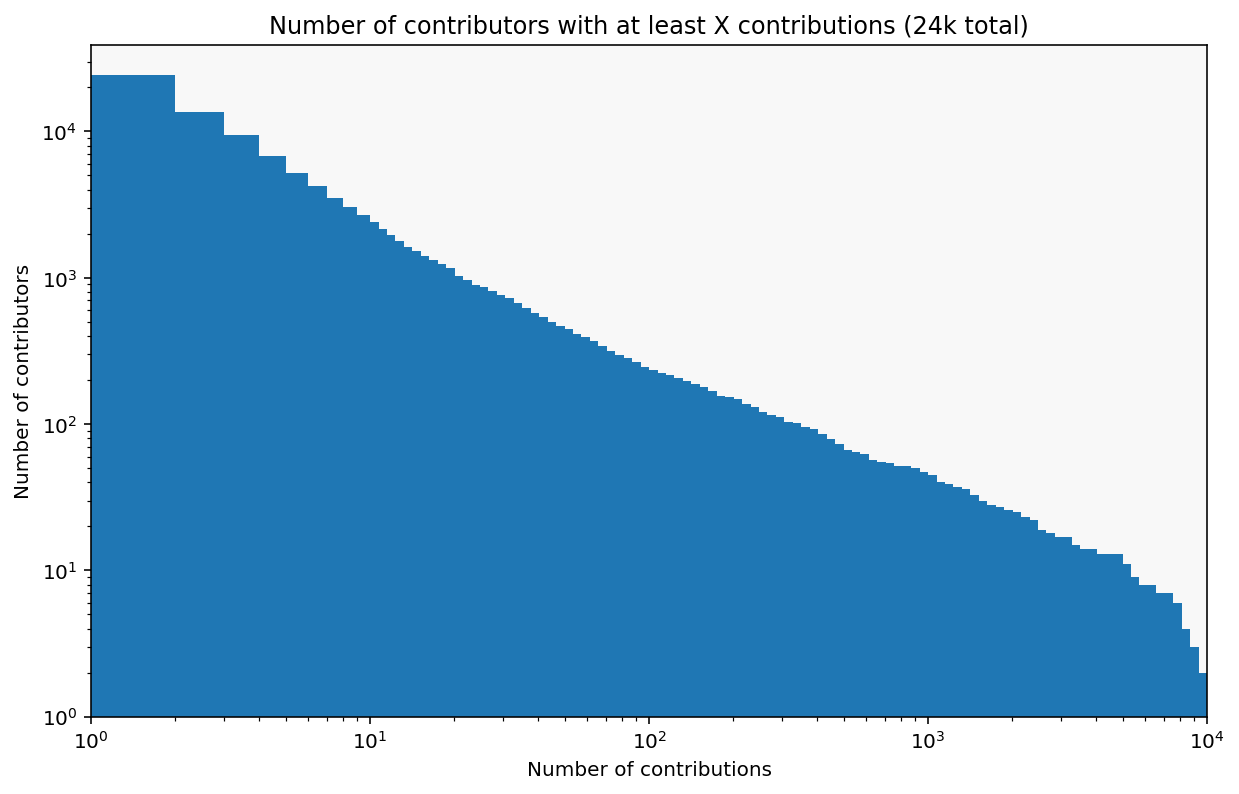

In [682]:
from itertools import chain

fig, ax = plt.subplots()
hist = df.actor_id.value_counts().plot(
    kind="hist",
    bins=bins,
    ax=ax,
    cumulative=-1,
)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel("Number of contributors")
ax.set_xlabel("Number of contributions")
ax.set_title(f"Number of contributors with at least X contributions ({df.actor_id.nunique()//1000}k total)")

ax.set_xlim(1, 10000)
ax.set_ylim(1, None)


In [669]:
k = 1000
counts = df.actor_id.value_counts()
counts
counts[counts<5].count(), len(counts)

(19225, 24428)

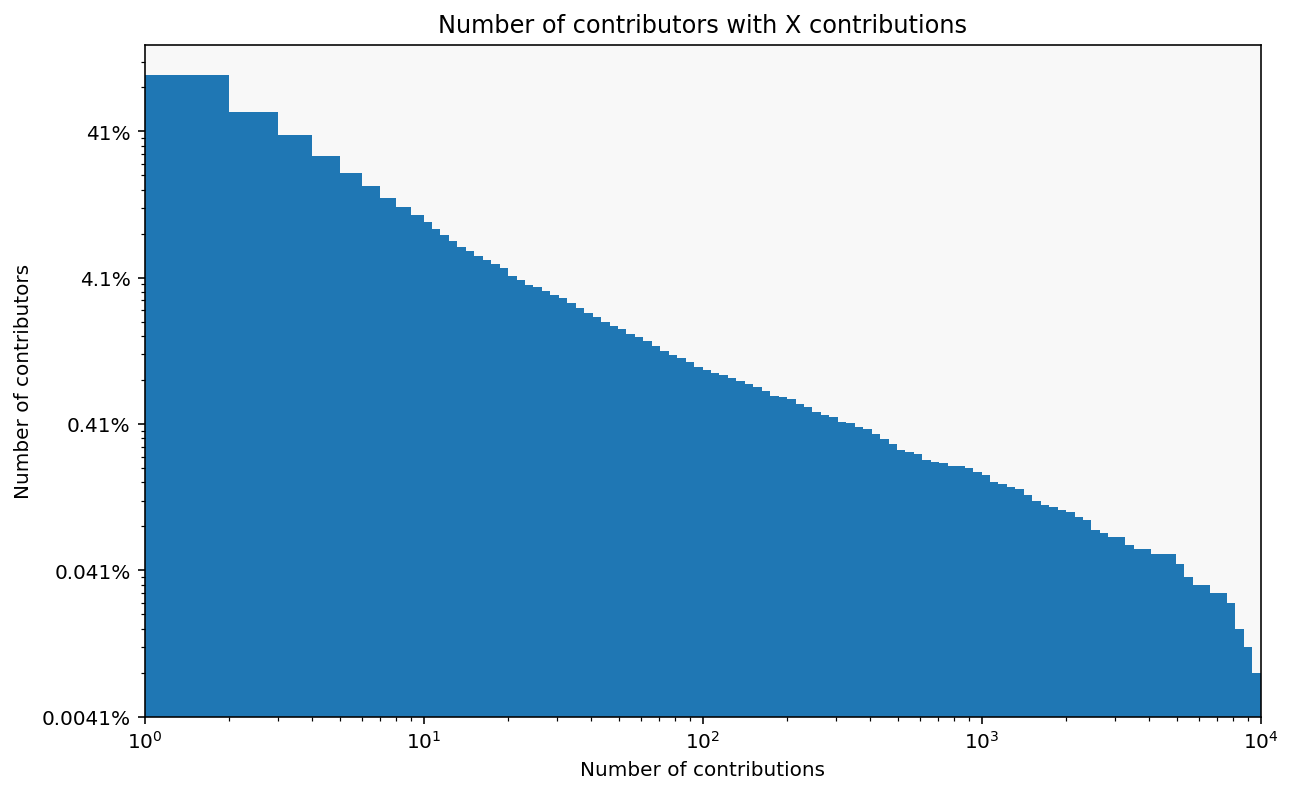

In [671]:
from matplotlib import ticker as tick

def adjust_y_axis(x, pos):
    return f"{100 * x / (len(df.actor_id.unique())):.2g}%"

ax.yaxis.set_major_formatter(tick.FuncFormatter(adjust_y_axis))
display(ax.figure)